In [1]:
# Import libraries
from __future__ import division
from astropy.io import fits
# from astropy.utils.data import get_pkg_data_filename
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
# from astropy.convolution import Gaussian2DKernel, Box2DKernel
# from astropy.modeling import models,fitting
# from astropy.convolution import convolve
# import matplotlib.gridspec as gridspec
# from numpy import inf
# from math import sqrt
# from os import listdir
# from os.path import isfile, join

In [2]:
# 59, 61 target 20 min
# 60 sky 10 min
path = r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00059_ocube.fits'
#path = r'/Users/caridlin/Documents/KCWI20201120/redux_obsolete/kb201120_00059_scubed.fits'


image = fits.open(path)
h = image[0].header
c = image[0].data
w, x, y = c.shape
print(w, x, y)

path = r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00061_ocube.fits'


image = fits.open(path)
h1 = image[0].header
c1 = image[0].data
w, x, y = c1.shape
print(w, x, y)

path = r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00060_ocube.fits'


image = fits.open(path)
h2 = image[0].header
c2 = image[0].data
w, x, y = c2.shape
print(w, x, y)

c[np.isnan(c)] = 0
c1[np.isnan(c1)] = 0
c2[np.isnan(c2)] = 0

2588 70 24
2588 70 24
2588 70 24


In [3]:
# h2

In [4]:
def indextowl(w_):
    return h["CRVAL3"] + h["CD3_3"]*(w_ - h["CRPIX3"])

def wltoindex(wl_):
    return int((wl_ - h["CRVAL3"])/h["CD3_3"] + h["CRPIX3"])

#indextowl(50)

wl = []
for w_ in range(w):
    wl.append(indextowl(w_))

In [5]:
# Boundaries, x1, x2, y1, y2 only for ocubed
# x1 = 14
# x2 = 82
# y1 = 5
# y2 = 29
w1 = wltoindex(h2['WAVGOOD0'])
w2 = wltoindex(h2['WAVGOOD1'])

In [6]:
# d = np.sum(c[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 2.9e5, vmax = 3.6e5)

In [7]:
# d = np.sum(c1[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 2.7e5, vmax = 3.4e5)

In [8]:
# d = np.sum(c2[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5)

<IPython.core.display.Javascript object>


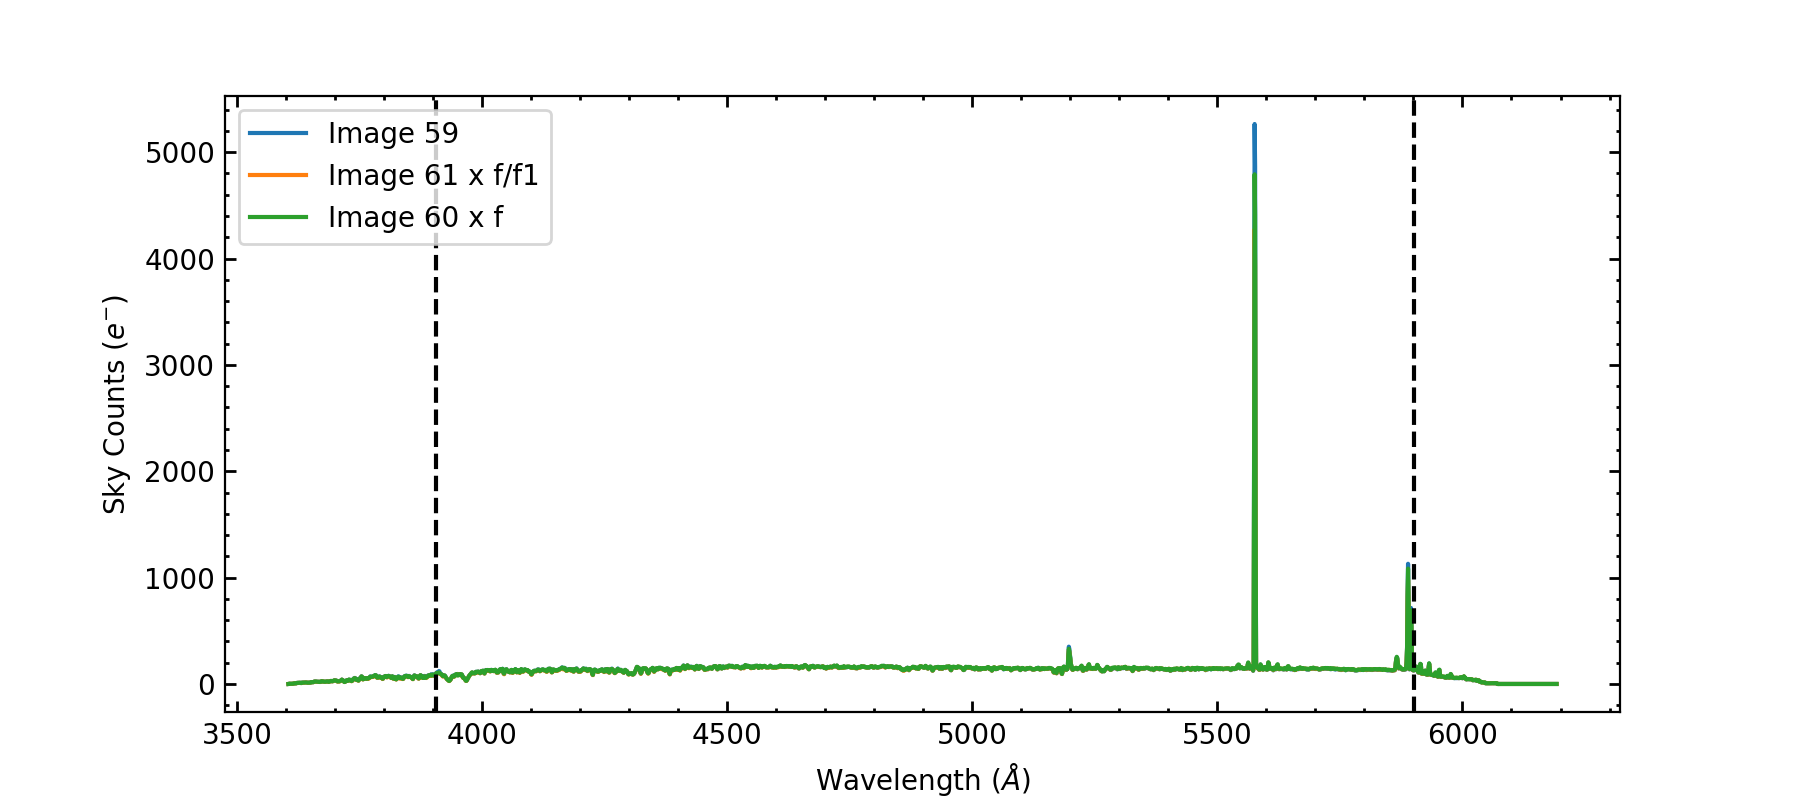

2.08118 1.953471


In [9]:
plt.figure(figsize=(9,4))
f = np.median(c) / np.median(c2)
f1 = np.median(c1) / np.median(c2)
# f = 2
# f1 = 2
print(f, f1)
# plt.plot(wl, c2[:, 16, 4], label = 'Pixel 16, 4')
# plt.plot(wl, c2[:, 18, 6], label = 'Pixel 18, 6')
# plt.plot(wl, c2[:, 20, 8], label = 'Pixel 20, 8')
# plt.plot(wl, c2[:, 22, 10], label = 'Pixel 22, 10')
plt.plot(wl, np.mean(c[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 59')
plt.plot(wl, f/f1 * np.mean(c1[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61 x f/f1')
plt.plot(wl, f * np.mean(c2[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60 x f')

# plt.plot(wl, np.mean(c[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 59')
# plt.plot(wl, 1 * np.mean(c1[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61')
# plt.plot(wl, 2 * np.mean(c2[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60 x 2')

plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-20, 300])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend(loc = 2)

# Step 1: masks and zeroth-order sky subtraction

This step is done for the sky image. The zeroth-order sky spectrum is the median for each wavelength.

Masking is needed if there are faint continuum sources in the sky field. Will add later.

## Masks

(1386, 1994)


<IPython.core.display.Javascript object>


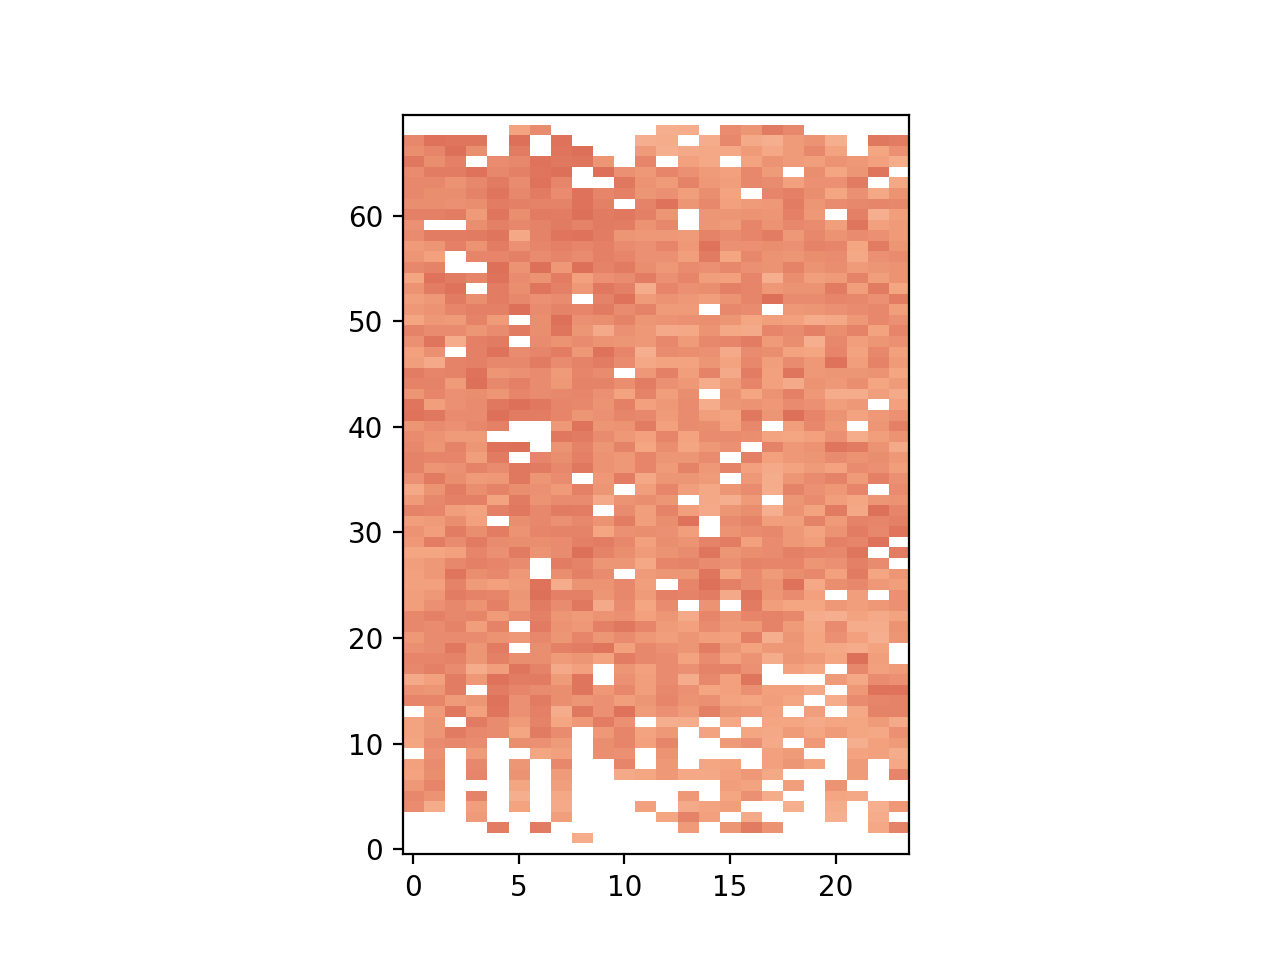

In [10]:
from astropy.stats import sigma_clip

d2 = np.sum(c2[w1:w2], axis = 0)
d2_filtered = sigma_clip(d2, sigma=2, maxiters=5,  masked=True)
c2_mask = d2_filtered.mask
e2 = []

for x_ in range(x):
    for y_ in range(y):
        if c2_mask[x_, y_] == False:
            e2.append(c2[w1:w2, x_, y_])
e2 = np.array(e2)
print(e2.shape)

plt.figure()
plt.imshow(d2_filtered, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 1.3e5, vmax = 1.5e5)

In [11]:
Ave_sky = np.median(e2, axis = 0)
print(Ave_sky.shape)
print(len(wl[w1:w2]))

(1994,)
1994


<IPython.core.display.Javascript object>


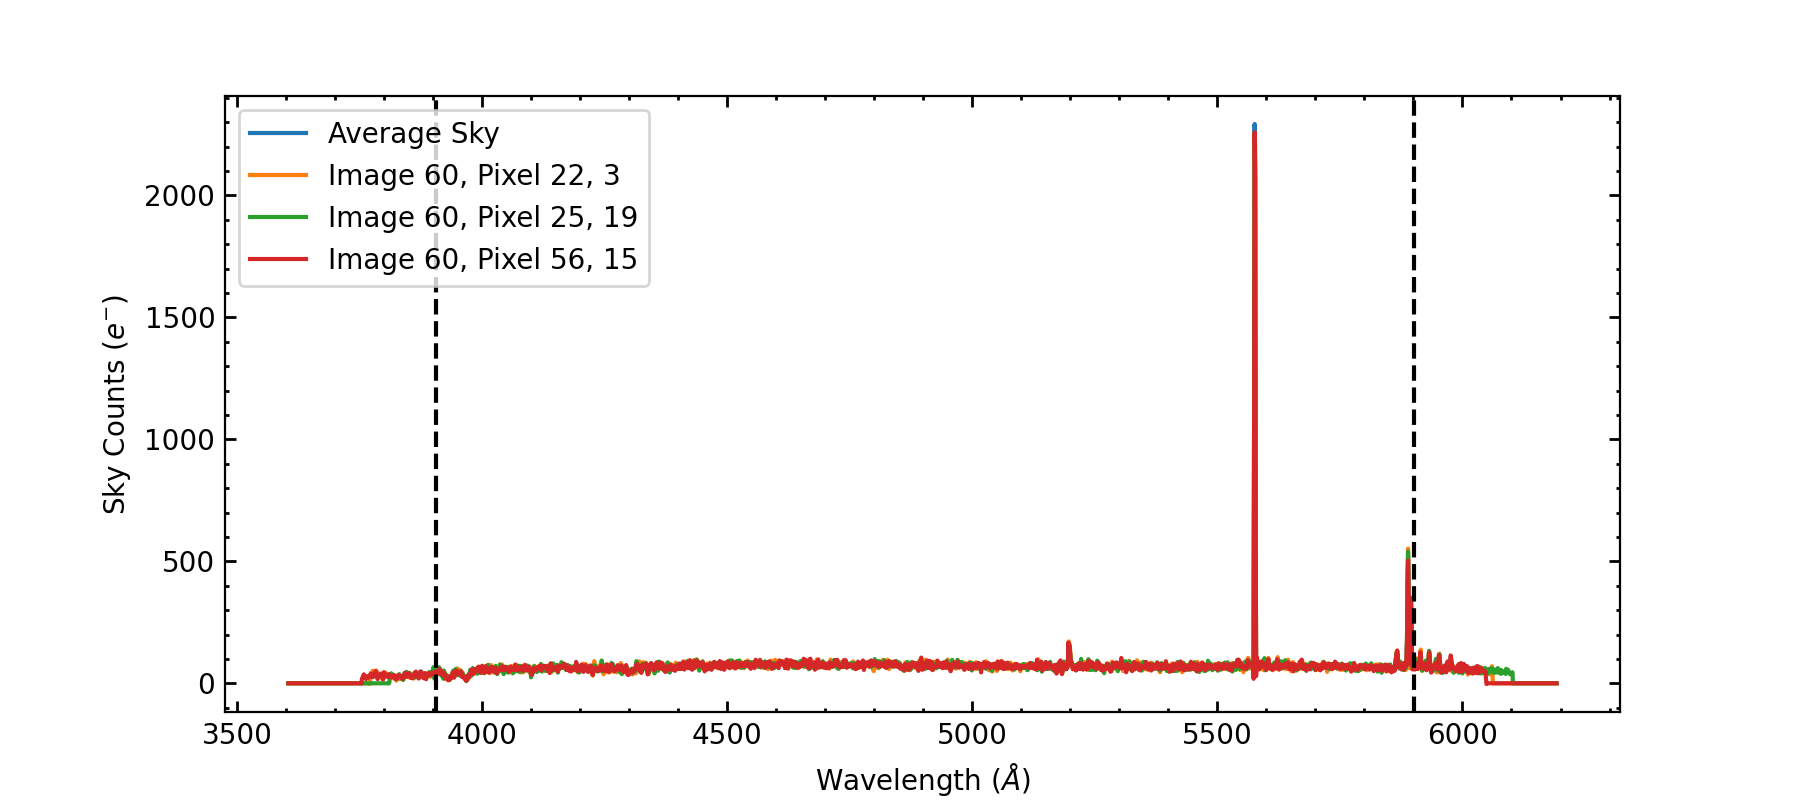

In [12]:
plt.figure(figsize=(9,4))

plt.plot(wl[w1:w2], Ave_sky, label = 'Average Sky')
#plt.plot(wl, np.mean(c2[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61')
plt.plot(wl, c2[:, 22, 3], label = 'Image 60, Pixel 22, 3')
plt.plot(wl, c2[:, 25, 19], label = 'Image 60, Pixel 25, 19')
plt.plot(wl, c2[:, 56, 15], label = 'Image 60, Pixel 56, 15')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend(loc = 2)

In [13]:
sky_res = c2.copy()
for x_ in range(x):
    for y_ in range(y):
        #if x_ in range(x1, x2) and y_ in range(y1, y2):
        sky_res[w1:w2, x_, y_] = np.subtract(c2[w1:w2, x_, y_], Ave_sky)
        sky_res[:w1, x_, y_] = np.subtract(c2[:w1, x_, y_], c2[:w1, x_, y_])
        sky_res[w2:, x_, y_] = np.subtract(c2[w2:, x_, y_], c2[w2:, x_, y_])

In [14]:
# d = np.sum(sky_res[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5)

<IPython.core.display.Javascript object>


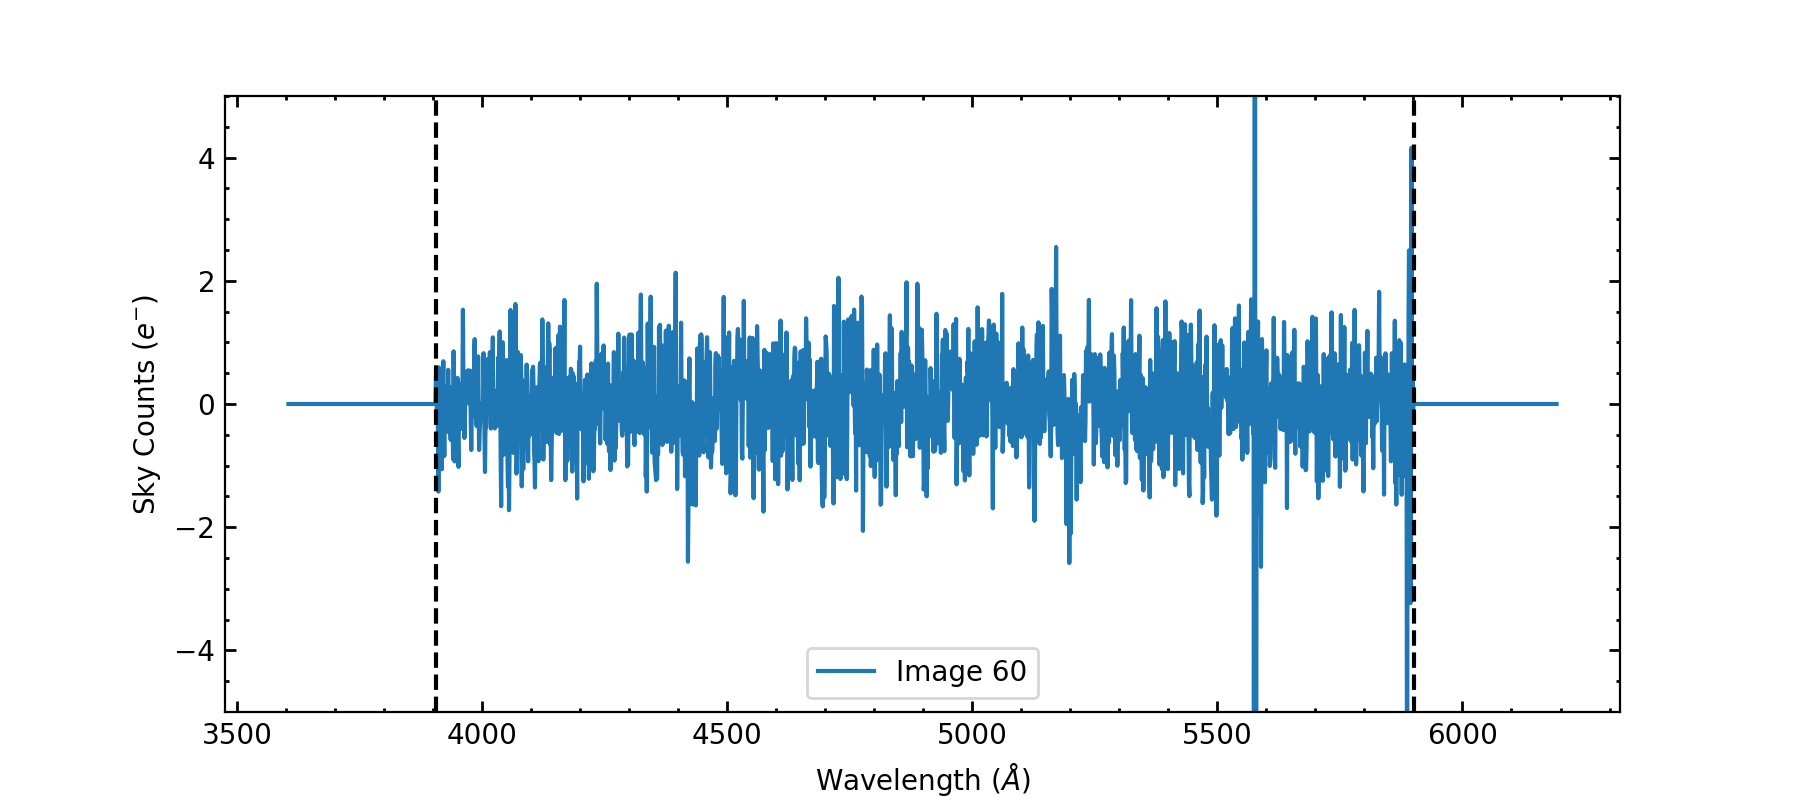

In [15]:
plt.figure(figsize=(9,4))
#plt.plot(wl, Ave_sky, label = 'Sky')
plt.plot(wl, np.median(sky_res[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.ylim([-5, 5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

# Step 2: source/continuum filtering

# This step is found to be super critical !!!

Apply a weighted median filter to the residual sky spectrum. And subtract this from the original spectrum.

ZAP PCA uses a small window size 50-100 pixels for this process. This corresponds to 50 - 100 * 1.25 Angstrom.

The broadest sky features in the residual (plot above) is only 10 A (which is 10 pixels). I choose to use the 50 * 1.25 = 75 pixels window size.

Questions:

1. Parameters to tune: quantile, cfwidth, and weight. 

In [16]:
# Ref: https://stackoverflow.com/questions/26102867/python-weighted-median-algorithm-with-pandas
# No existing code in numpy or scipy.ndimage for calculating weighted median


def weighted_quantile(values, quantiles = 0.5, sample_weight=None, 
                      values_sorted = False, old_style = False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values).flatten()
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight).flatten()
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [17]:
# Ref: https://stackoverflow.com/questions/24413843/how-do-i-use-scipy-ndimage-filters-gereric-filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_filter.html#scipy.ndimage.generic_filter

# For some reason, the full 3D version doesn't work, has to do it spaxel by spaxel which takes time.
# Mode = 'reflect' seems to work better than mode = 'constant'

from scipy import ndimage
cfwidth = 75

sky_res_cfw = np.empty((w, x, y))      

for x_ in range(x):
    if x_ % 5 == 1: print(x_)
    for y_ in range(y):
        sky_res_cfw[:, x_, y_] = ndimage.generic_filter(sky_res[:, x_, y_], weighted_quantile, size=(cfwidth), mode = 'reflect', extra_keywords = {'quantiles': 0.5, 'sample_weight': (abs(sky_res[:, x_, y_]) + 10)})



1
6
11
16
21
26
31
36
41
46
51
56
61
66


<IPython.core.display.Javascript object>


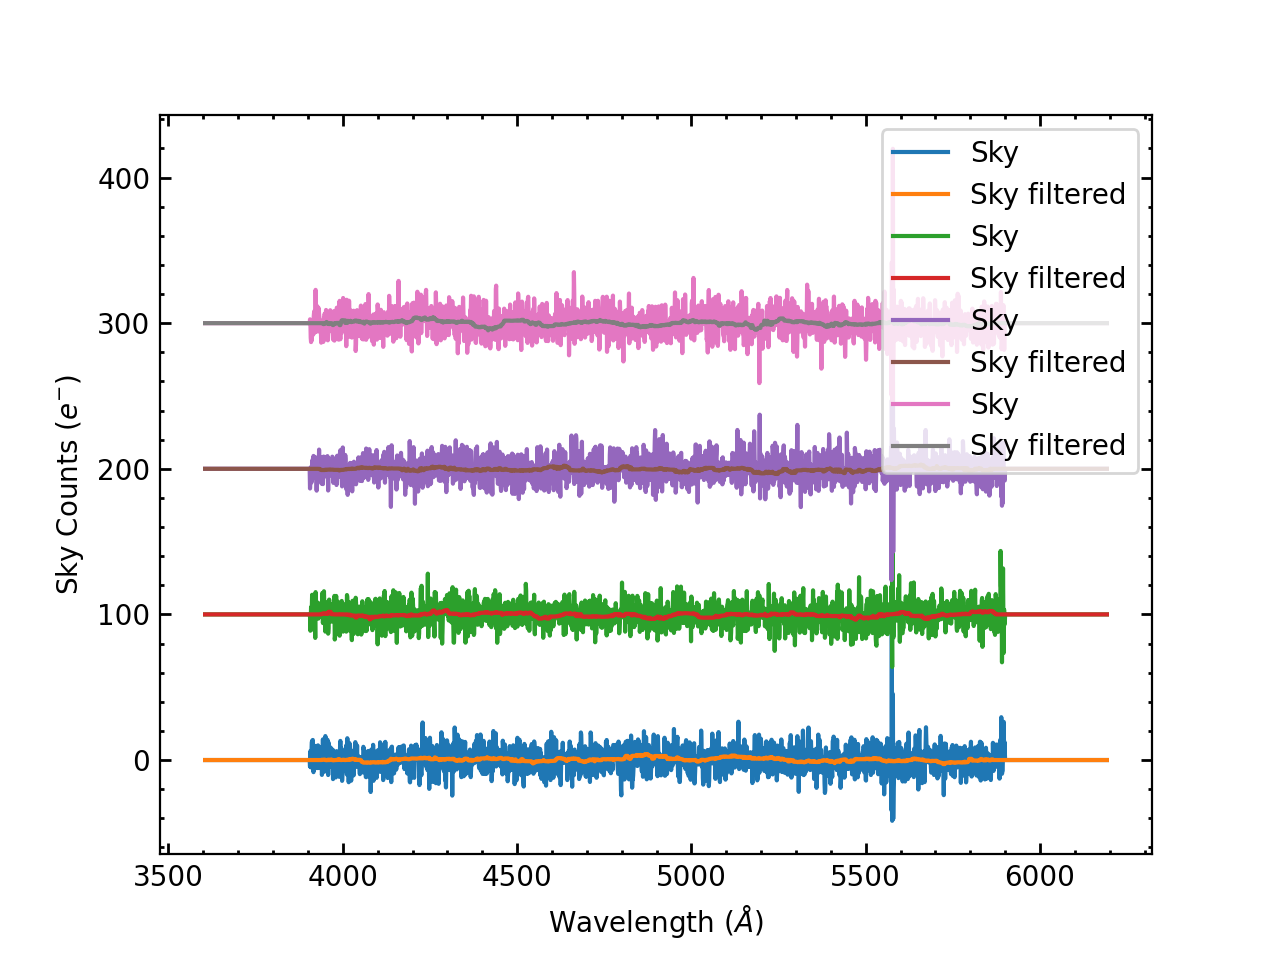

In [18]:
plt.figure()
plt.plot(wl, sky_res[:, 22, 3], label = 'Sky')
plt.plot(wl, sky_res_cfw[:, 22, 3], label = 'Sky filtered')
plt.plot(wl, sky_res[:, 25, 19] + 100, label = 'Sky')
plt.plot(wl, sky_res_cfw[:, 25, 19] + 100, label = 'Sky filtered')
plt.plot(wl, sky_res[:, 56, 15] + 200, label = 'Sky')
plt.plot(wl, sky_res_cfw[:, 56, 15] + 200, label = 'Sky filtered')
plt.plot(wl, sky_res[:, 17, 13] + 300, label = 'Sky')
plt.plot(wl, sky_res_cfw[:, 17, 13] + 300, label = 'Sky filtered')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

In [19]:
sky_res_sub = sky_res - sky_res_cfw

# Step 3: principle component analysis

## Spectrum segmentation

In [20]:
w3 = wltoindex(4750)
w4 = wltoindex(5400)
sky_res1_sub = sky_res_sub[w1:w3]
sky_res2_sub = sky_res_sub[w3:w4]
sky_res3_sub = sky_res_sub[w4:w2]
sky_res4_sub = sky_res_sub[w1:w2]

<IPython.core.display.Javascript object>


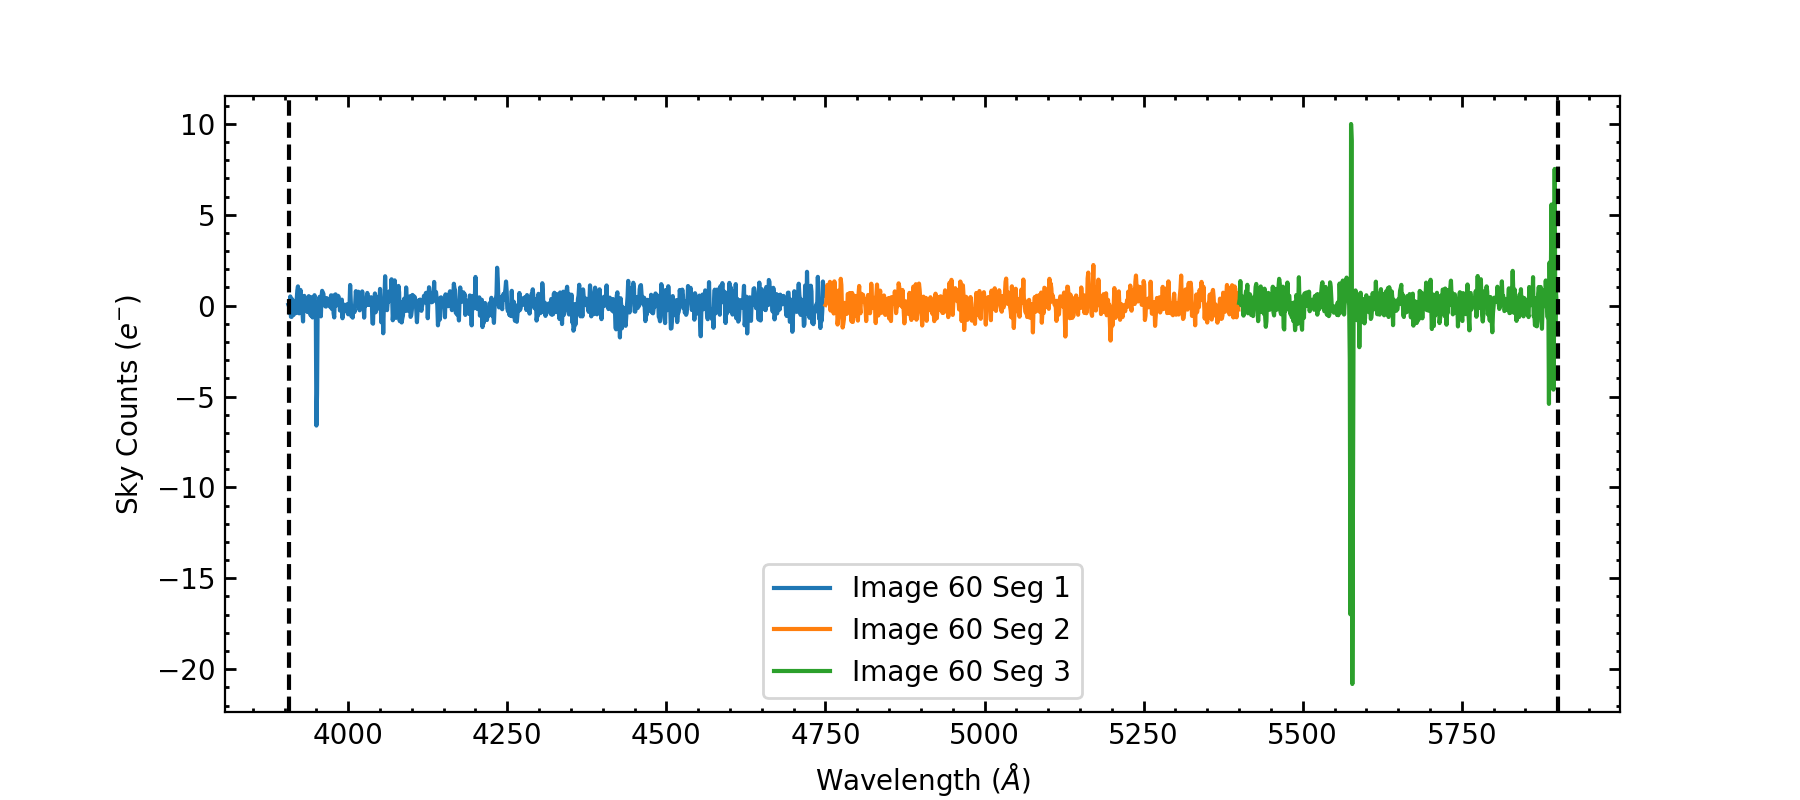

In [21]:
plt.figure(figsize=(9,4))
#plt.plot(wl, Ave_sky, label = 'Sky')

plt.plot(wl[w1:w3], np.mean(sky_res1_sub[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60 Seg 1')
plt.plot(wl[w3:w4], np.mean(sky_res2_sub[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60 Seg 2')
plt.plot(wl[w4:w2], np.mean(sky_res3_sub[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 60 Seg 3')
# plt.plot(wl, sky_res[:, 27, 22], label = 'Image 60')
# plt.plot(wl, sky_res[:, 72, 17], label = 'Image 60')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

## Spectra normalization

In [22]:
# Ref: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html
# Prepare the inputs, need to reshape

sky_res1_pca = np.empty((sky_res1_sub.shape[1] * sky_res1_sub.shape[2], sky_res1_sub.shape[0]))
sky_res2_pca = np.empty((sky_res2_sub.shape[1] * sky_res2_sub.shape[2], sky_res2_sub.shape[0]))
sky_res3_pca = np.empty((sky_res3_sub.shape[1] * sky_res3_sub.shape[2], sky_res3_sub.shape[0]))
print(sky_res1_pca.shape)
print(sky_res1_sub.shape)
print(sky_res2_pca.shape)
print(sky_res3_pca.shape)

ct = 0
for x_ in range(sky_res1_sub.shape[1]):
    for y_ in range(sky_res1_sub.shape[2]):
        sky_res1_pca[ct] = sky_res1_sub[:, x_, y_]
        sky_res2_pca[ct] = sky_res2_sub[:, x_, y_]
        sky_res3_pca[ct] = sky_res3_sub[:, x_, y_]
        ct = ct + 1

sky_res4_pca = np.empty((sky_res4_sub.shape[1] * sky_res4_sub.shape[2], sky_res4_sub.shape[0]))
print(sky_res4_pca.shape)
print(sky_res4_sub.shape)


ct = 0
for x_ in range(sky_res4_sub.shape[1]):
    for y_ in range(sky_res4_sub.shape[2]):
        sky_res4_pca[ct] = sky_res4_sub[:, x_, y_]
        ct = ct + 1

(1680, 844)
(844, 70, 24)
(1680, 650)
(1680, 500)
(1680, 1994)
(1994, 70, 24)


<IPython.core.display.Javascript object>


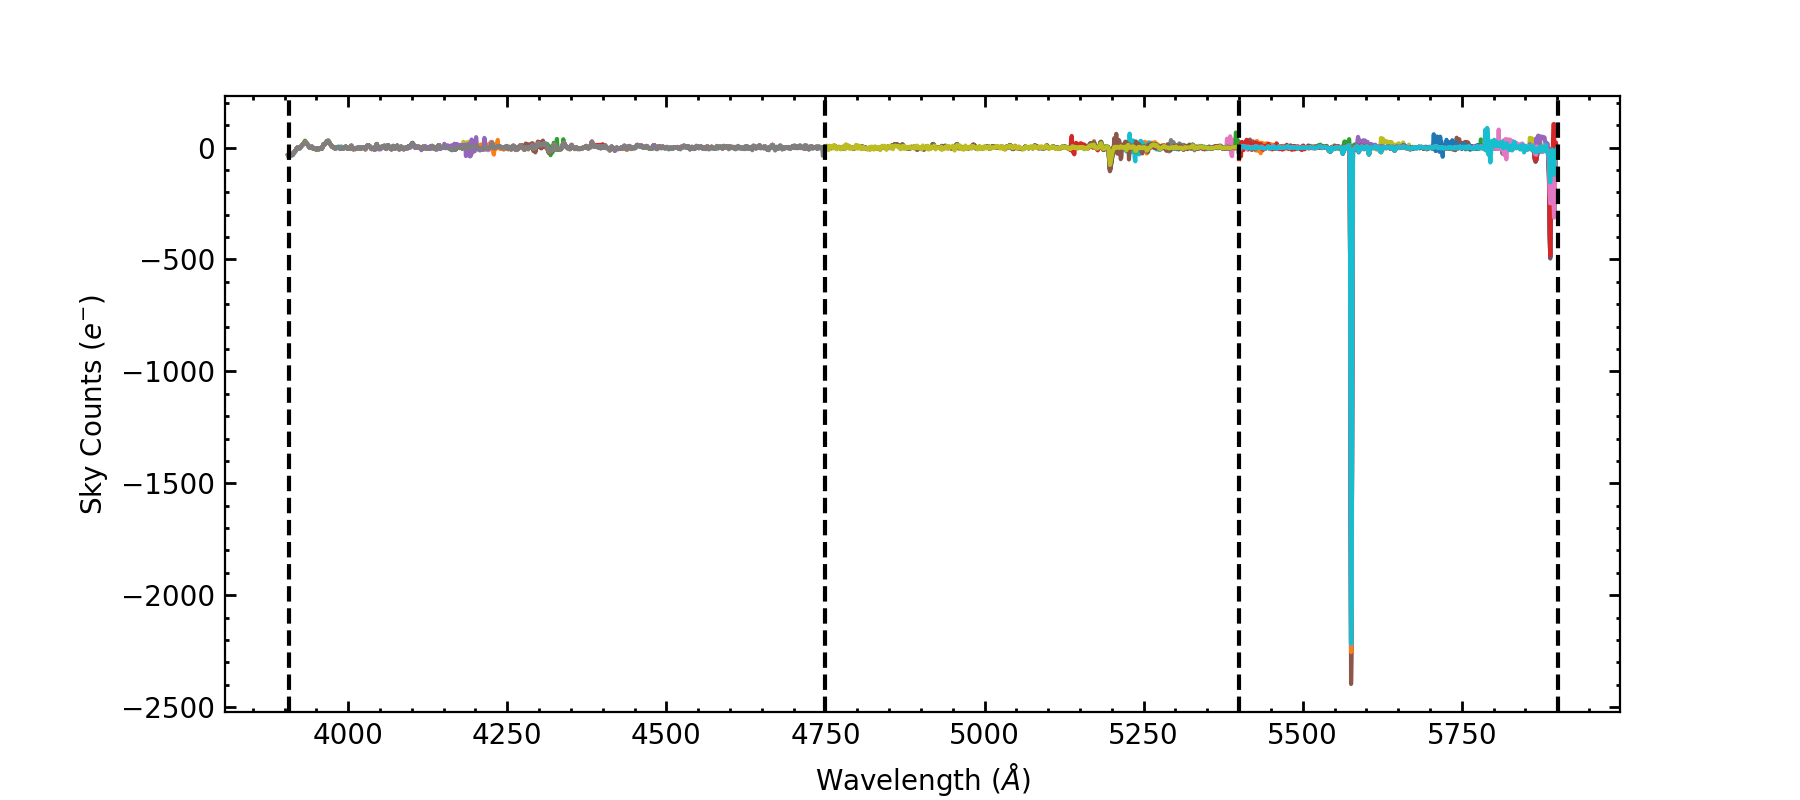

Text(0, 0.5, 'Sky Counts ($e^{-}$)')

In [23]:
plt.figure(figsize=(9,4))
for ct in range(10):
    plt.plot(wl[w1:w3], sky_res1_pca[ct])
    plt.plot(wl[w3:w4], sky_res2_pca[ct])
    plt.plot(wl[w4:w2], sky_res3_pca[ct])
# plt.plot(wl, sky_res[:, 27, 22], label = 'Image 60')
# plt.plot(wl, sky_res[:, 72, 17], label = 'Image 60')
plt.axvline(4750, color = 'black', linestyle = '--')
plt.axvline(5400, color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
#plt.legend()

<IPython.core.display.Javascript object>


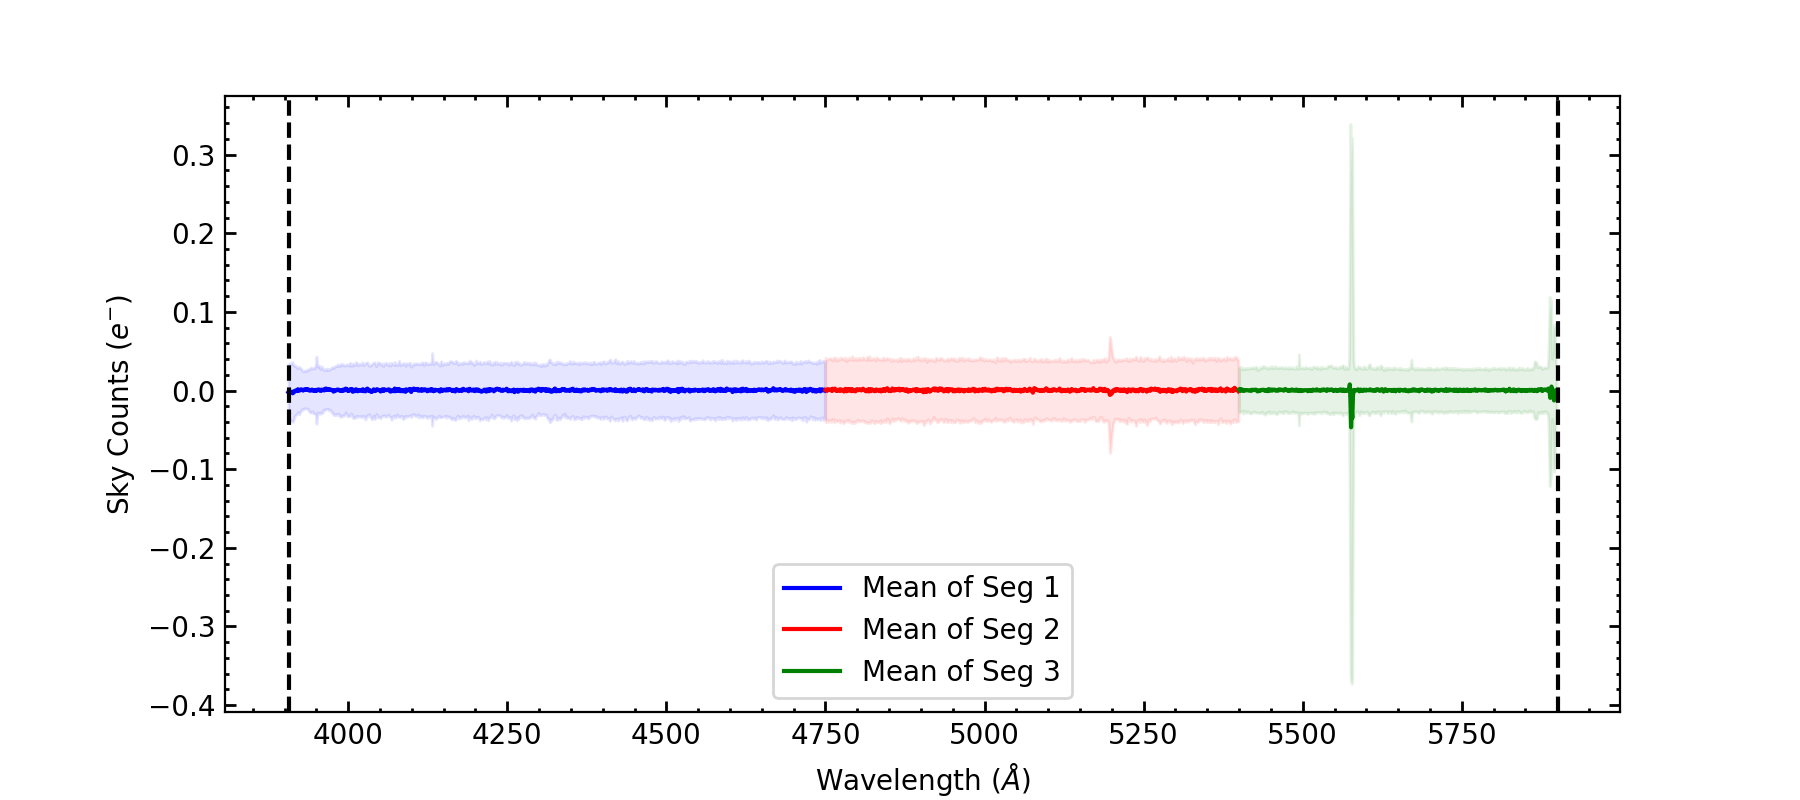

In [24]:
from sklearn import preprocessing


sky_res1_pca_pre = preprocessing.normalize(sky_res1_pca)
sky_res2_pca_pre = preprocessing.normalize(sky_res2_pca)
sky_res3_pca_pre = preprocessing.normalize(sky_res3_pca)

mu1 = sky_res1_pca_pre.mean(0)
mu2 = sky_res2_pca_pre.mean(0)
mu3 = sky_res3_pca_pre.mean(0)

std1 = sky_res1_pca_pre.std(0)
std2 = sky_res2_pca_pre.std(0)
std3 = sky_res3_pca_pre.std(0)


sky_res4_pca_pre = preprocessing.normalize(sky_res4_pca)

mu4 = sky_res4_pca_pre.mean(0)

std4 = sky_res4_pca_pre.std(0)

plt.figure(figsize=(9,4))

plt.plot(wl[w1:w3], mu1, color = 'blue', label = 'Mean of Seg 1')
plt.plot(wl[w3:w4], mu2, color = 'red', label = 'Mean of Seg 2')
plt.plot(wl[w4:w2], mu3, color = 'green', label = 'Mean of Seg 3')

plt.fill_between(wl[w1:w3], mu1 - std1, mu1 + std1, color =  'blue', alpha = 0.1)
plt.fill_between(wl[w3:w4], mu2 - std2, mu2 + std2, color =  'red', alpha = 0.1)
plt.fill_between(wl[w4:w2], mu3 - std3, mu3 + std3, color =  'green', alpha = 0.1)

# plt.plot(wl[w1:w2], mu4, color = 'blue', label = 'Mean')
# plt.fill_between(wl[w1:w2], mu4 - std4, mu4 + std4, color =  'blue', alpha = 0.1)

plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

In [25]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

pca1 = PCA()
seg1_projected = pca1.fit_transform(sky_res1_pca_pre)
print(seg1_projected.shape)
print(pca1.components_.shape)

pca2 = PCA()
seg2_projected = pca2.fit_transform(sky_res2_pca_pre)
print(seg2_projected.shape)
print(pca2.components_.shape)

pca3 = PCA()
seg3_projected = pca3.fit_transform(sky_res3_pca_pre)
print(seg3_projected.shape)
print(pca3.components_.shape)

pca4 = PCA()
seg4_projected = pca4.fit_transform(sky_res4_pca_pre)
print(seg4_projected.shape)
print(pca4.components_.shape)

(1680, 844)
(844, 844)
(1680, 650)
(650, 650)
(1680, 500)
(500, 500)
(1680, 1680)
(1680, 1994)


<IPython.core.display.Javascript object>


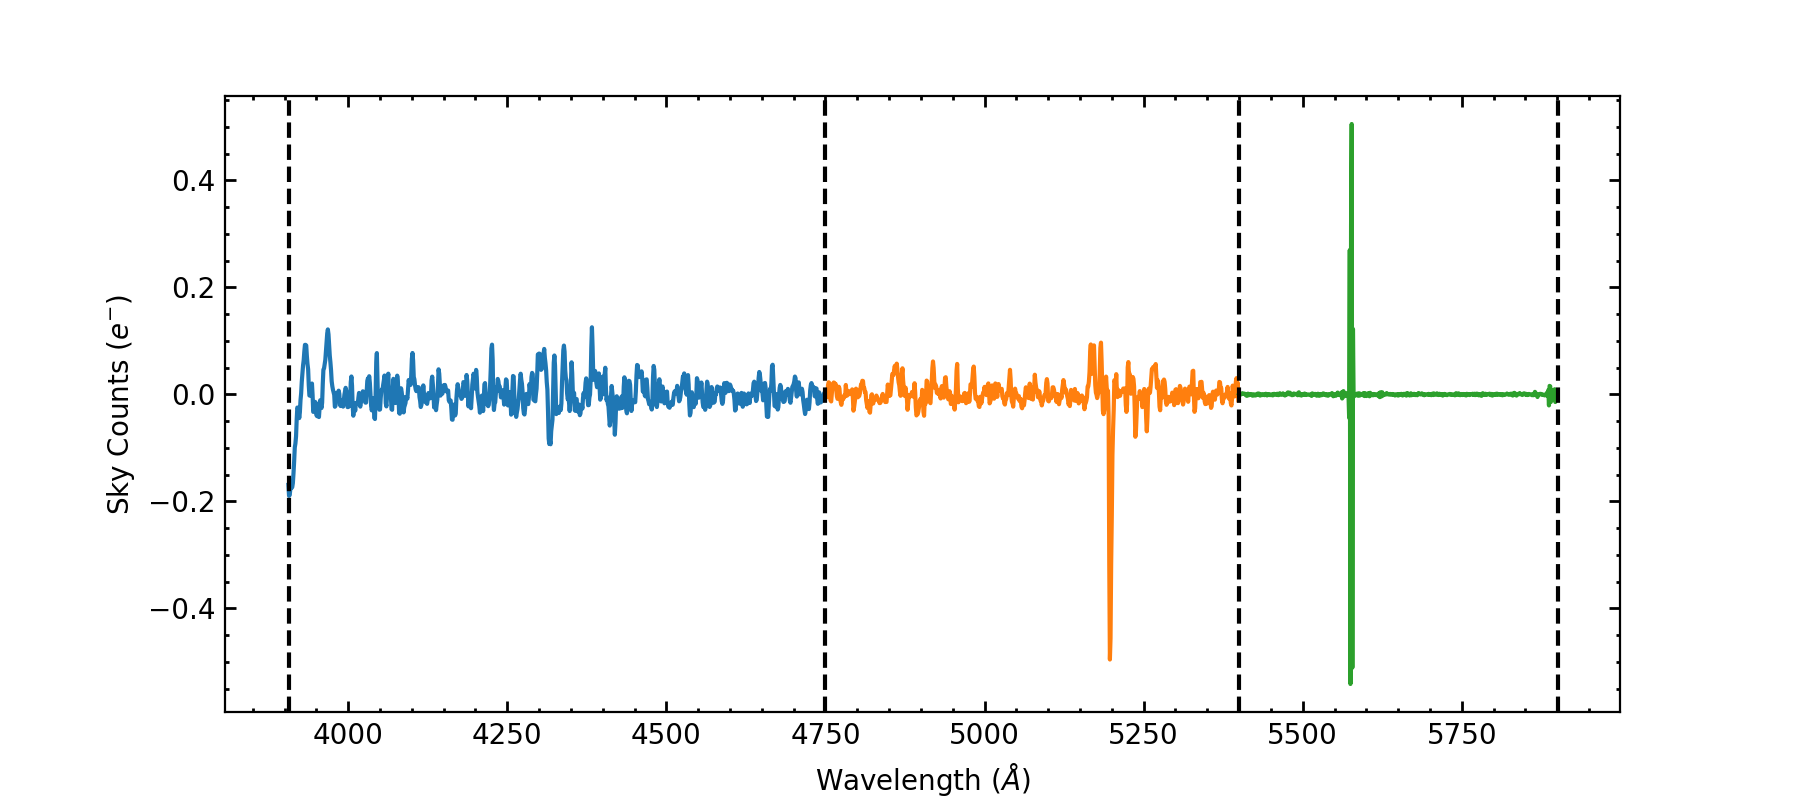

Text(0, 0.5, 'Sky Counts ($e^{-}$)')

In [26]:
# Print the PCA components

plt.figure(figsize=(9,4))

for ct in range(1):
    plt.plot(wl[w1:w3], pca1.components_[ct])
    plt.plot(wl[w3:w4], pca2.components_[ct])
    plt.plot(wl[w4:w2], pca3.components_[ct])
#    plt.plot(wl[w1:w2], pca4.components_[ct])

plt.axvline(4750, color = 'black', linestyle = '--')
plt.axvline(5400, color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
#plt.legend()

## Optimizing the dimension (numbers of eigenspectra)

In [27]:
# Ref: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/

<IPython.core.display.Javascript object>


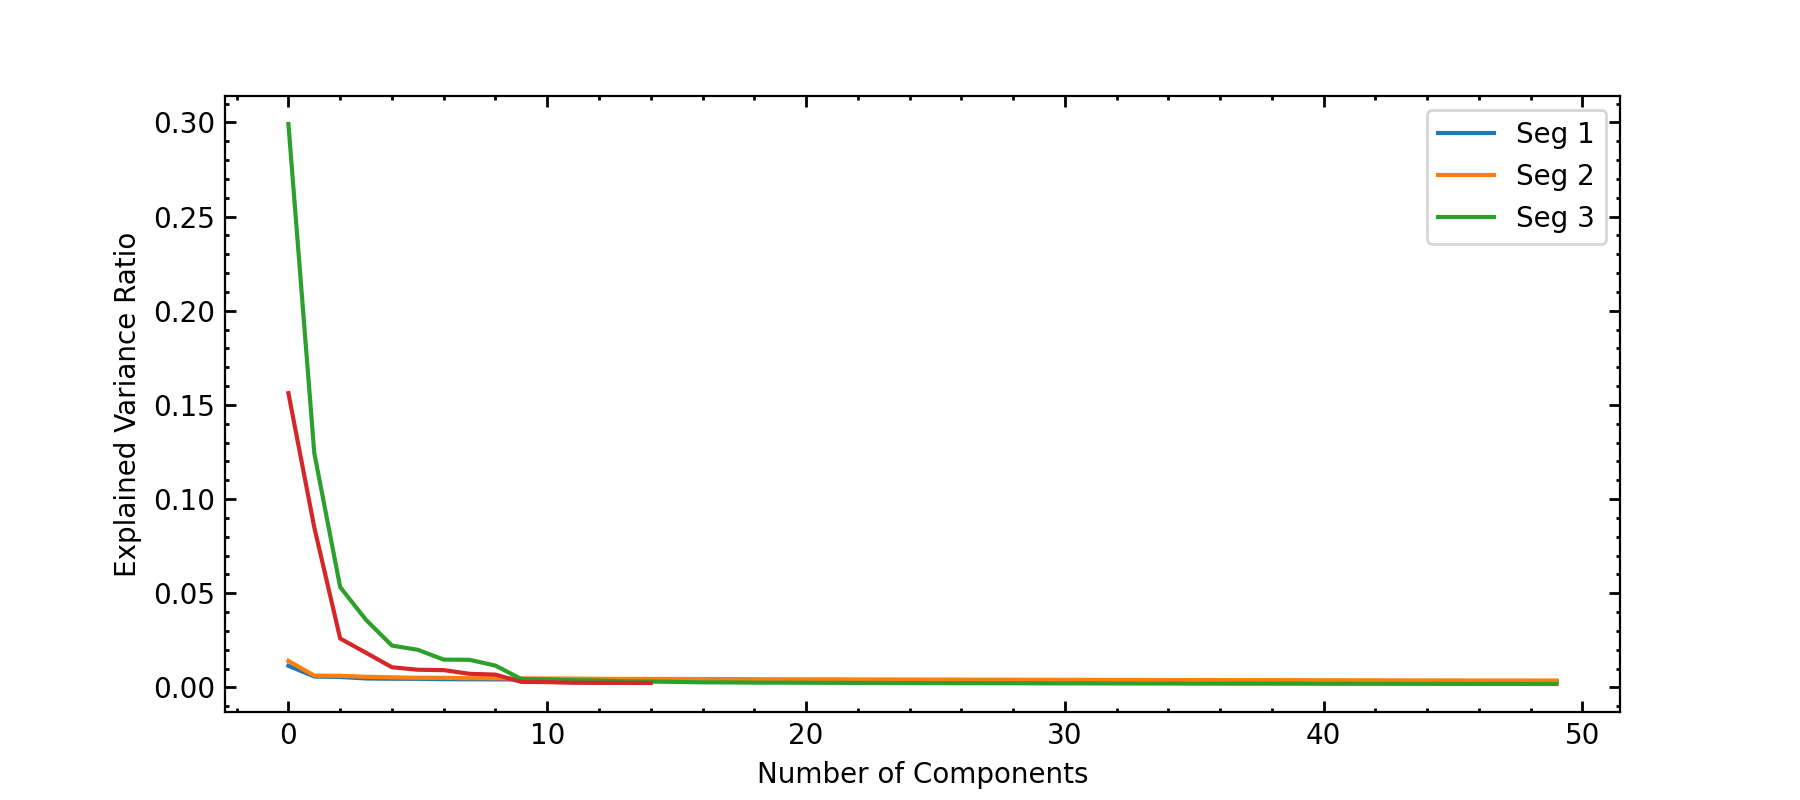

In [28]:
plt.figure(figsize=(9,4))
plt.plot(pca1.explained_variance_ratio_[:50], label = 'Seg 1')
plt.plot(pca2.explained_variance_ratio_[:50], label = 'Seg 2')
plt.plot(pca3.explained_variance_ratio_[:50], label = 'Seg 3')
plt.plot(pca4.explained_variance_ratio_[:15])
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()

<IPython.core.display.Javascript object>


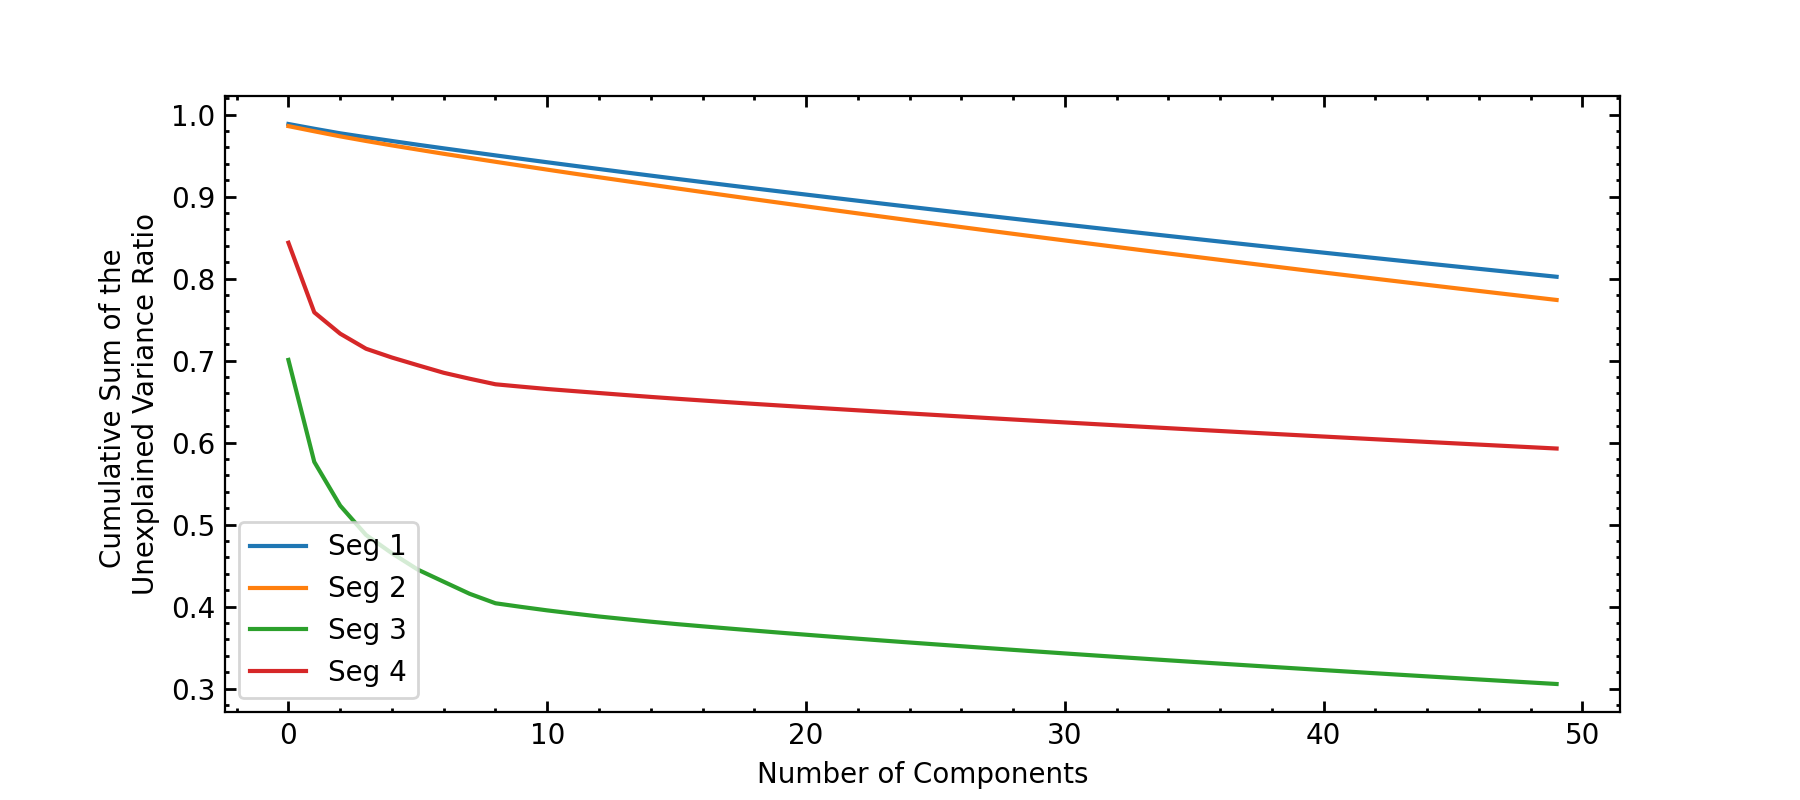

In [29]:
plt.figure(figsize=(9,4))
plt.plot(1 - np.cumsum(pca1.explained_variance_ratio_[:50]), label = 'Seg 1')
plt.plot(1 - np.cumsum(pca2.explained_variance_ratio_[:50]), label = 'Seg 2')
plt.plot(1 - np.cumsum(pca3.explained_variance_ratio_[:50]), label = 'Seg 3')
plt.plot(1 - np.cumsum(pca4.explained_variance_ratio_[:50]), label = 'Seg 4')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Number of Components')
plt.ylabel('Cumulative Sum of the \nUnexplained Variance Ratio')
plt.legend()

<IPython.core.display.Javascript object>


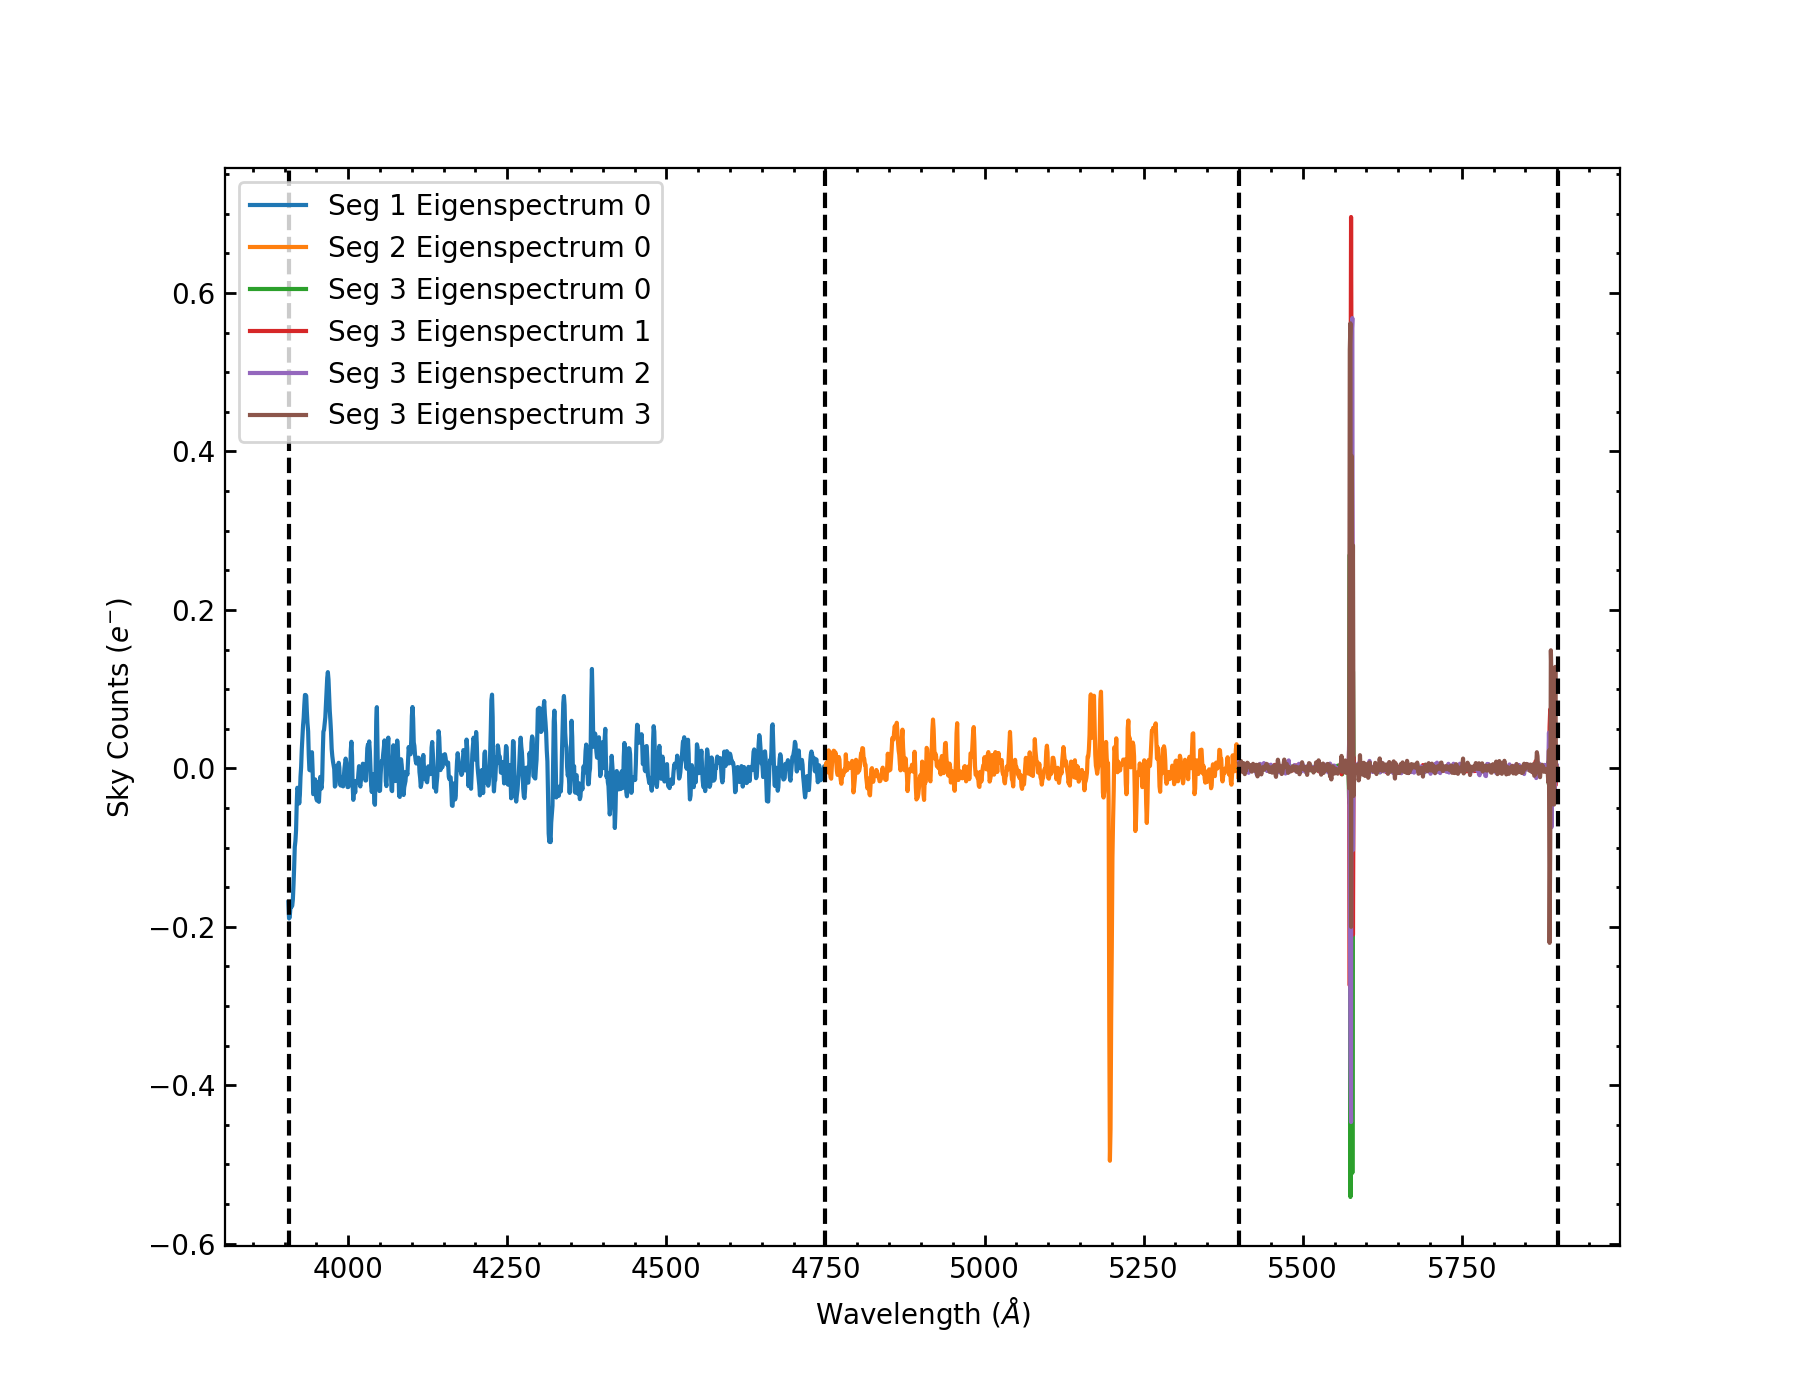

In [30]:
# Print the PCA components

plt.figure(figsize=(9,7))

for ct in range(4):
    if ct < 1:
        plt.plot(wl[w1:w3], pca1.components_[ct], label = 'Seg 1 Eigenspectrum %d' % ct)
        plt.plot(wl[w3:w4], pca2.components_[ct], label = 'Seg 2 Eigenspectrum %d' % ct)
    plt.plot(wl[w4:w2], pca3.components_[ct], label = 'Seg 3 Eigenspectrum %d' % ct)
#    plt.plot(wl[w1:w2], pca4.components_[ct], label = 'Seg 4 Eigenspectrum %d' % ct)

plt.axvline(4750, color = 'black', linestyle = '--')
plt.axvline(5400, color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

In [31]:
# pca1 = PCA(n_components = 9)
# seg1_projected = pca1.fit_transform(sky_res1_pca_pre)
# print(seg1_projected.shape)
# print(pca1.components_.shape)

# pca2 = PCA(n_components = 9)
# seg2_projected = pca2.fit_transform(sky_res2_pca_pre)
# print(seg2_projected.shape)
# print(pca2.components_.shape)

# pca3 = PCA(n_components = 9)
# seg3_projected = pca3.fit_transform(sky_res3_pca_pre)
# print(seg3_projected.shape)
# print(pca3.components_.shape)

# pca4 = PCA(n_components = 9)
# seg4_projected = pca4.fit_transform(sky_res4_pca_pre)
# print(seg4_projected.shape)
# print(pca4.components_.shape)

<IPython.core.display.Javascript object>


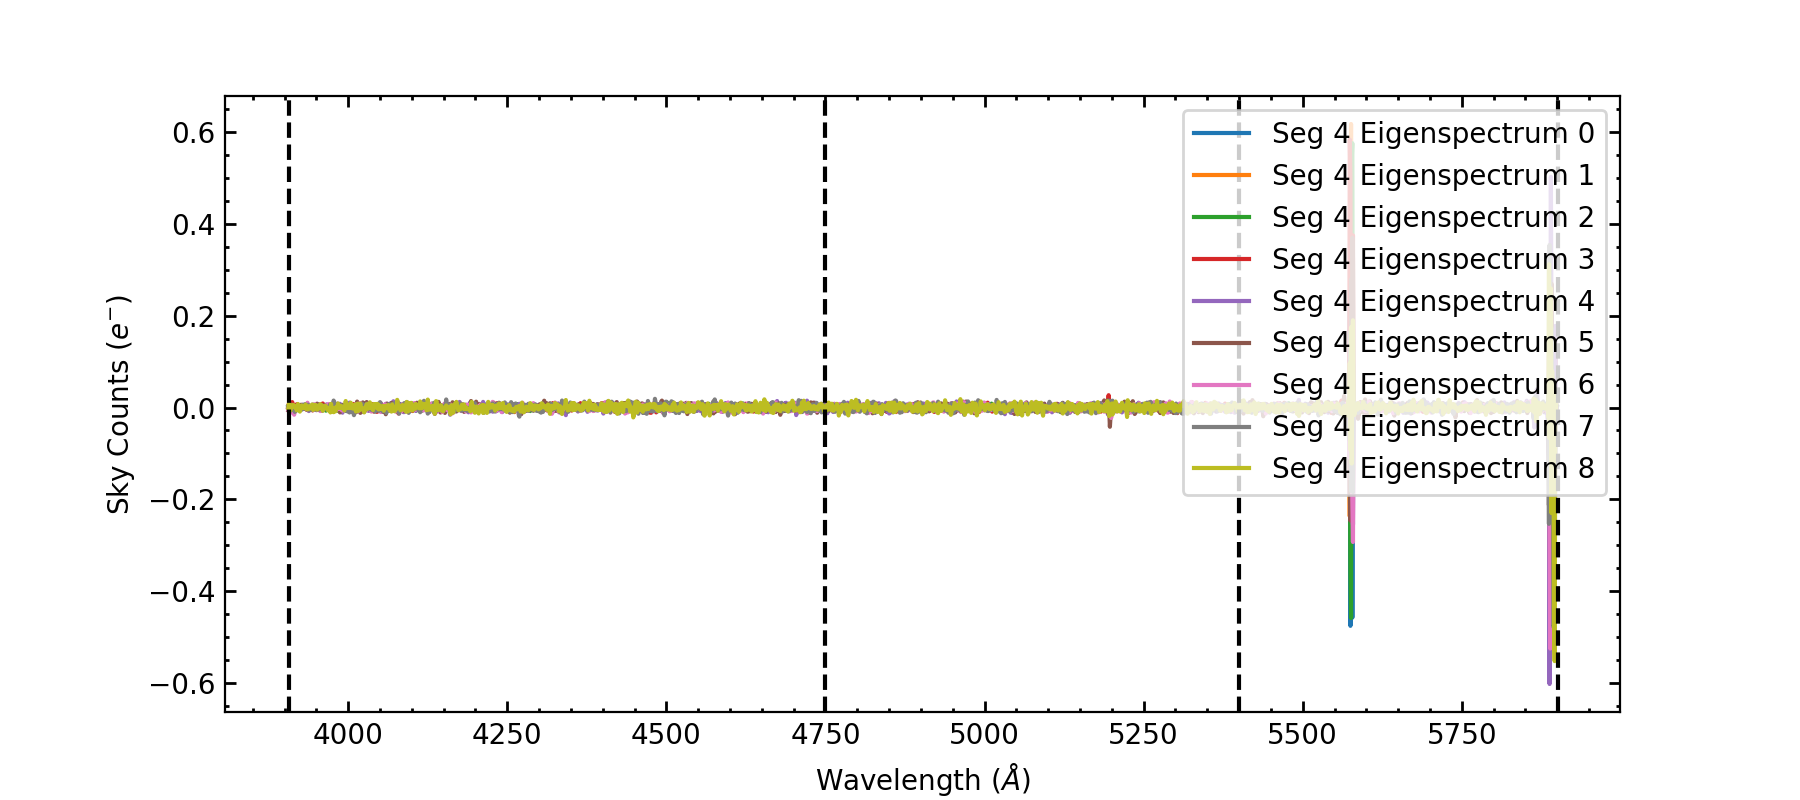

In [32]:
# Print the PCA components

plt.figure(figsize=(9,4))

for ct in range(9):
#     if ct < 1:
#         plt.plot(wl[w1:w3], pca1.components_[ct], label = 'Seg 1 Eigenspectrum %d' % ct)
#         plt.plot(wl[w3:w4], pca2.components_[ct], label = 'Seg 2 Eigenspectrum %d' % ct)
#     plt.plot(wl[w4:w2], pca3.components_[ct], label = 'Seg 3 Eigenspectrum %d' % ct)
    plt.plot(wl[w1:w2], pca4.components_[ct], label = 'Seg 4 Eigenspectrum %d' % ct)

plt.axvline(4750, color = 'black', linestyle = '--')
plt.axvline(5400, color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

# Step 4: filtering the science frame

## Sigma Clip

(1366, 1994)
(1350, 1994)


<IPython.core.display.Javascript object>


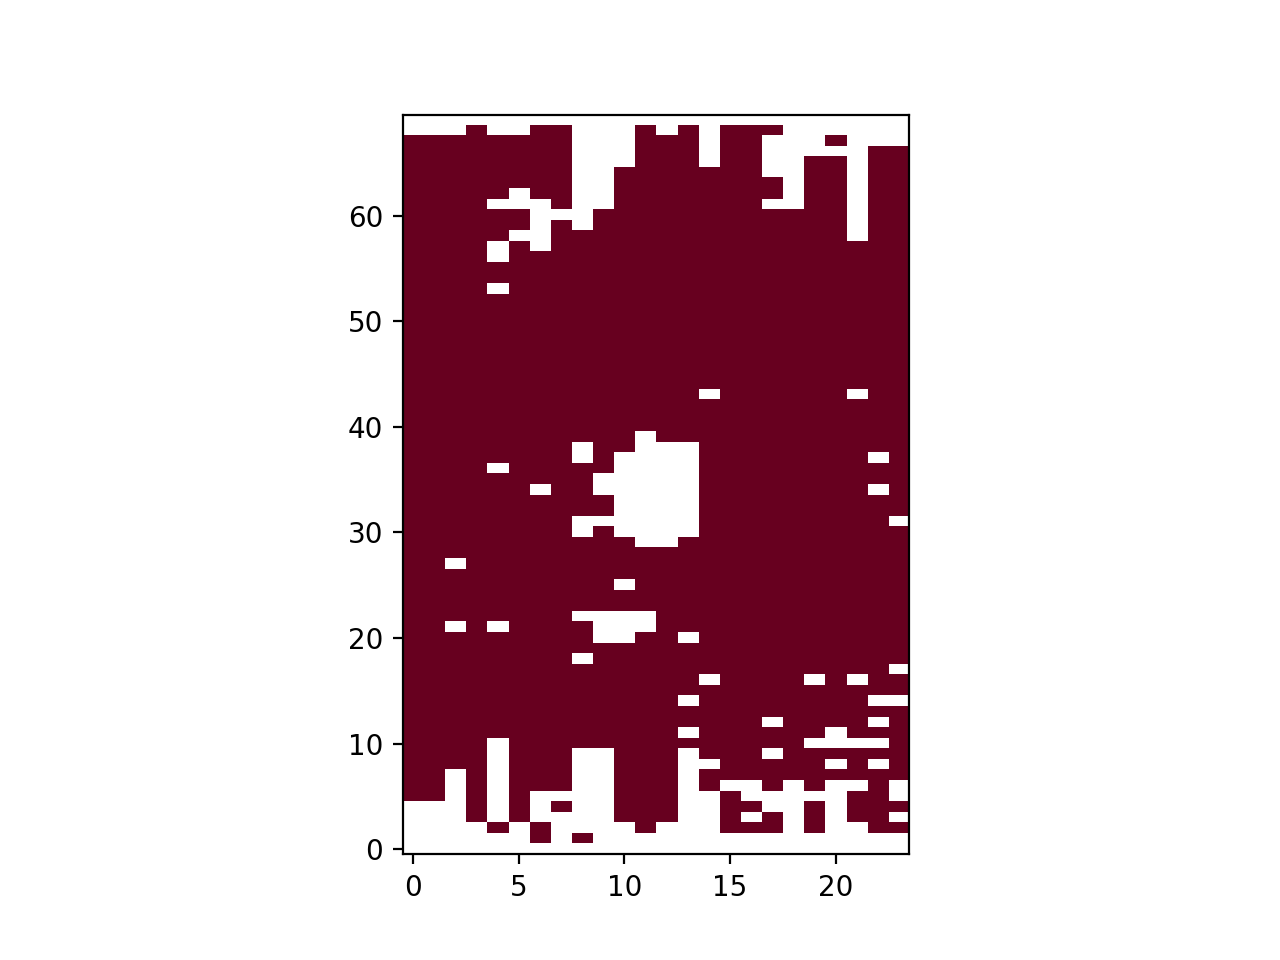

In [33]:
from astropy.stats import sigma_clip

d = np.sum(c[w1:w2], axis = 0)
d_filtered = sigma_clip(d, sigma=2, maxiters=5,  masked=True)
c_mask = d_filtered.mask
    
d1 = np.sum(c1[w1:w2], axis = 0)
d1_filtered = sigma_clip(d1, sigma=2, maxiters=5,  masked=True)
c1_mask = d1_filtered.mask

e = []
e1 = []

for x_ in range(x):
    for y_ in range(y):
        if c_mask[x_, y_] == False:
            e.append(c[w1:w2, x_, y_] / Ave_sky)
e = np.array(e)
print(e.shape)

for x_ in range(x):
    for y_ in range(y):
        if c1_mask[x_, y_] == False:
            e1.append(c1[w1:w2, x_, y_] / Ave_sky)
e1 = np.array(e1)
print(e1.shape)

plt.figure()
plt.imshow(d_filtered, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 1.3e5, vmax = 1.5e5)

## Subtract the zeroth-order sky

In [34]:
c_sky_sub = c.copy()
c_sky = f * c2.copy()
c1_sky_sub = c1.copy()
c1_sky = f1 * c2.copy()

f = np.median(e[w1:w2])
f1 = np.median(e1[w1:w2])

print(f, f1)
        

for x_ in range(x):
    for y_ in range(y):
        c_sky_sub[w1:w2, x_, y_] = np.subtract(c[w1:w2, x_, y_], f * Ave_sky)
        c1_sky_sub[w1:w2, x_, y_] = np.subtract(c1[w1:w2, x_, y_], f1 * Ave_sky)
        c_sky[w1:w2, x_, y_] = f * Ave_sky
        c1_sky[w1:w2, x_, y_] = f1 * Ave_sky
        c_sky_sub[:w1, x_, y_] = np.subtract(c[:w1, x_, y_], f * c2[:w1, x_, y_])
        c_sky_sub[w2:, x_, y_] = np.subtract(c[w2:, x_, y_], f * c2[w2:, x_, y_])
        c1_sky_sub[:w1, x_, y_] = np.subtract(c1[:w1, x_, y_], f1 * c2[:w1, x_, y_])
        c1_sky_sub[w2:, x_, y_] = np.subtract(c1[w2:, x_, y_], f1 * c2[w2:, x_, y_])

c_sky_sub_filtered = []
c1_sky_sub_filtered = []

for x_ in range(x):
    for y_ in range(y):
        if c_mask[x_, y_] == False:
            c_sky_sub_filtered.append(np.concatenate((c_sky_sub[w1:wltoindex(5500), x_, y_], c_sky_sub[wltoindex(5600):w2, x_, y_])))
c_sky_sub_filtered = np.array(c_sky_sub_filtered)
print(c_sky_sub_filtered.shape)

for x_ in range(x):
    for y_ in range(y):
        if c1_mask[x_, y_] == False:
            c1_sky_sub_filtered.append(np.concatenate((c1_sky_sub[w1:wltoindex(5500), x_, y_], c1_sky_sub[wltoindex(5600):w2, x_, y_])))
c1_sky_sub_filtered = np.array(c1_sky_sub_filtered)
print(c1_sky_sub_filtered.shape)

2.06429 1.9279218
(1366, 1894)
(1350, 1894)


In [35]:
# d = np.sum(c[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d_filtered, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 2.9e5, vmax = 3.7e5)

In [36]:
# d = np.sum(c1_sky_sub_filtered[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5)

In [37]:
from astropy.modeling import models, fitting

p_init = models.Polynomial1D(degree=1)
fit_p = fitting.LevMarLSQFitter()

p = fit_p(p_init, np.concatenate((wl[w1:wltoindex(5500)], wl[wltoindex(5600):w2])), np.median(c_sky_sub_filtered, axis = 0))

p1_init = models.Polynomial1D(degree=1)
fit_p1 = fitting.LevMarLSQFitter()

p1 = fit_p1(p1_init, np.concatenate((wl[w1:wltoindex(5500)], wl[wltoindex(5600):w2])), np.median(c1_sky_sub_filtered, axis = 0))


c_sky_sub_pol = c_sky_sub.copy()
c1_sky_sub_pol = c1_sky_sub.copy()
c_sky_pol = c_sky.copy()
c1_sky_pol = c1_sky.copy()

for x_ in range(x):
    for y_ in range(y):
        c_sky_sub_pol[w1:w2, x_, y_] = np.subtract(c_sky_sub[w1:w2, x_, y_], p(wl[w1:w2]))
        c1_sky_sub_pol[w1:w2, x_, y_] = np.subtract(c1_sky_sub[w1:w2, x_, y_], p1(wl[w1:w2]))
        c_sky_pol[w1:w2, x_, y_] = np.add(c_sky[w1:w2, x_, y_], p(wl[w1:w2]))
        c1_sky_pol[w1:w2, x_, y_] = np.add(c1_sky[w1:w2, x_, y_], p1(wl[w1:w2]))
        
print(p)
print(p1)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                  c1          
    ----------------- ----------------------
    8.806980931526915 -0.0018007133904236082
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                   c1         
    ------------------ ---------------------
    -1.236048243045035 0.0002162425393329546


<IPython.core.display.Javascript object>


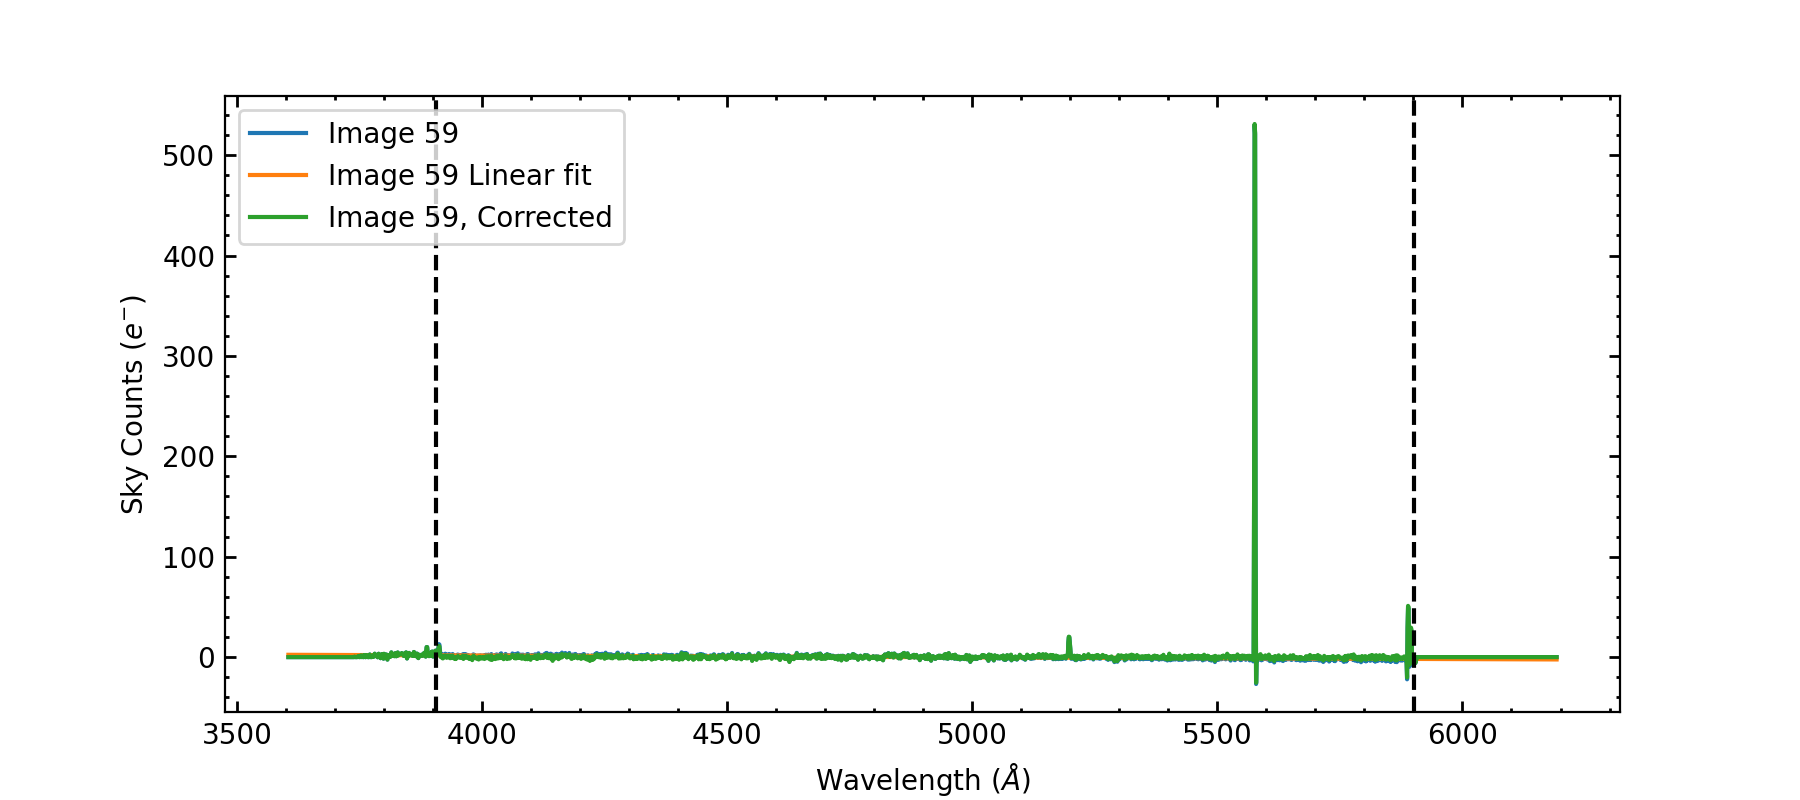

In [38]:
plt.figure(figsize=(9,4))
plt.plot(wl, np.median(c_sky_sub[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 59')
#plt.plot(wl, np.median(c1_sky_sub[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61')
plt.plot(wl, p(wl), label = 'Image 59 Linear fit')

plt.plot(wl, np.median(c_sky_sub_pol[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 59, Corrected')
#plt.plot(wl, np.mean(c1_sky_sub_pol[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61, pol')

#plt.plot(wl, np.mean(c_sky_sub[:, 45:55, 8:20], axis = (1, 2)), label = 'Image 59')
# plt.plot(wl, np.mean(c1_sky_sub[:, 45:55, 8:20], axis = (1, 2)), label = 'Image 61')

plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend(loc = 2)

## Filter with weighted-median filter

Apply a weighted median filter to the residual sky spectrum. And subtract this from the original spectrum.

ZAP PCA uses a small window size 20-50 pixels for this process. This corresponds to 20 - 30 * 1.25 Angstrom.

The broadest sky features in the residual (plot above) is only 10 A (which is 10 pixels). So I choose to use the 20 * 1.25 = 25 pixels window size.

Questions:

1. Parameters to tune: quantile, cfwidth, and weight. 

In [39]:
# Ref: https://stackoverflow.com/questions/24413843/how-do-i-use-scipy-ndimage-filters-gereric-filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_filter.html#scipy.ndimage.generic_filter

# from scipy import ndimage
cfwidth = 25

c_sky_sub_cfw = np.empty((w, x, y))      

for x_ in range(x):
    if x_ % 5 == 1: print(x_)
    for y_ in range(y):
        c_sky_sub_cfw[:, x_, y_] = ndimage.generic_filter(c_sky_sub_pol[:, x_, y_], weighted_quantile, size=(cfwidth), mode = 'reflect', extra_keywords = {'quantiles': 0.5, 'sample_weight': (abs(c_sky_sub_pol[:, x_, y_]) + 10)})

1
6
11
16
21
26
31
36
41
46
51
56
61
66


In [40]:
c1_sky_sub_cfw = np.empty((w, x, y))

for x_ in range(x):
    if x_ % 5 == 1: print(x_)
    for y_ in range(y):
        c1_sky_sub_cfw[:, x_, y_] = ndimage.generic_filter(c1_sky_sub_pol[:, x_, y_], weighted_quantile, size=(cfwidth), mode = 'reflect', extra_keywords = {'quantiles': 0.5, 'sample_weight': (abs(c1_sky_sub_pol[:, x_, y_]) + 10)})

1
6
11
16
21
26
31
36
41
46
51
56
61
66


<IPython.core.display.Javascript object>


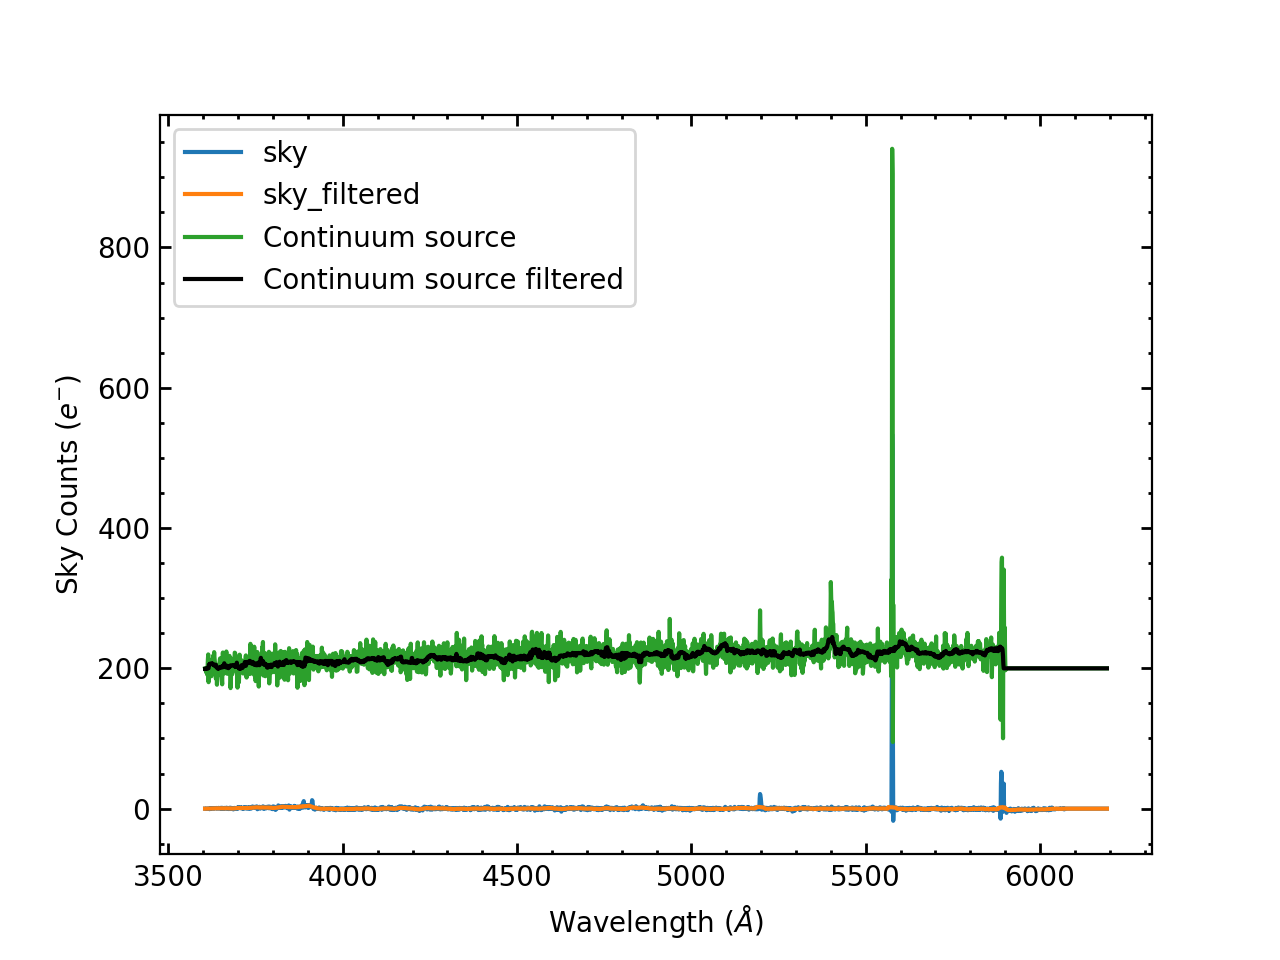

In [41]:
plt.figure()

plt.plot(wl, np.mean(c_sky_sub_pol[:, 16:29, 4:19], axis = (1, 2)), label = 'sky')
plt.plot(wl, np.mean(c_sky_sub_cfw[:, 16:29, 4:19], axis = (1, 2)), label = 'sky_filtered')
plt.plot(wl, c_sky_sub[:, 32, 12] + 200, label = 'Continuum source')
plt.plot(wl, c_sky_sub_cfw[:, 32, 12] + 200, label = 'Continuum source filtered', color = 'black')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

<IPython.core.display.Javascript object>


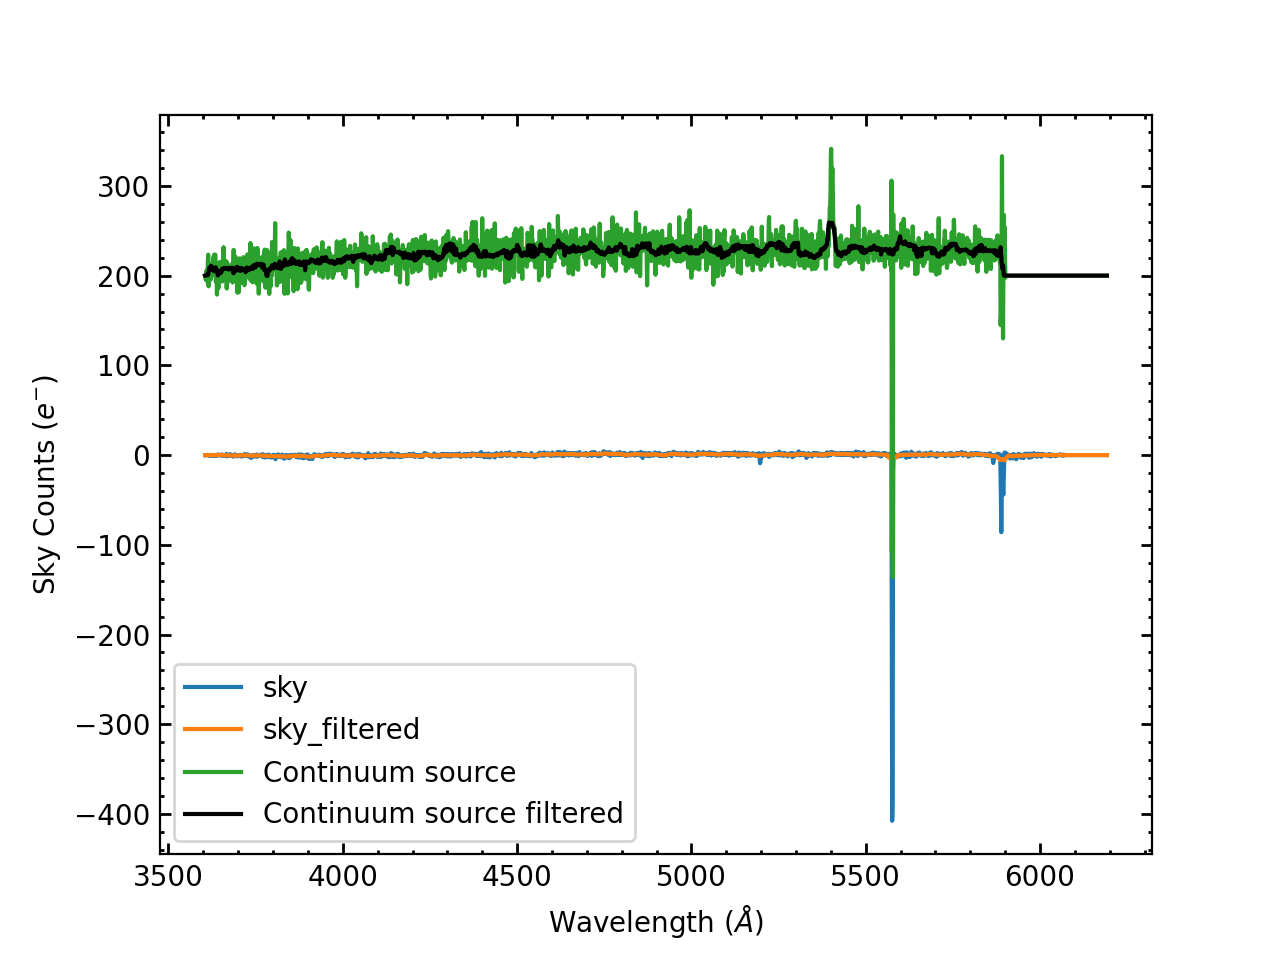

In [42]:
plt.figure()


plt.plot(wl, np.mean(c1_sky_sub_pol[:, 16:29, 4:19], axis = (1, 2)), label = 'sky')
plt.plot(wl, np.mean(c1_sky_sub_cfw[:, 16:29, 4:19], axis = (1, 2)), label = 'sky_filtered')
plt.plot(wl, c1_sky_sub[:, 32, 12] + 200, label = 'Continuum source')
plt.plot(wl, c1_sky_sub_cfw[:, 32, 12] + 200, label = 'Continuum source filtered', color = 'black')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

In [43]:
c_sky_res = c_sky_sub_pol - c_sky_sub_cfw
c1_sky_res = c1_sky_sub_pol - c1_sky_sub_cfw

<IPython.core.display.Javascript object>


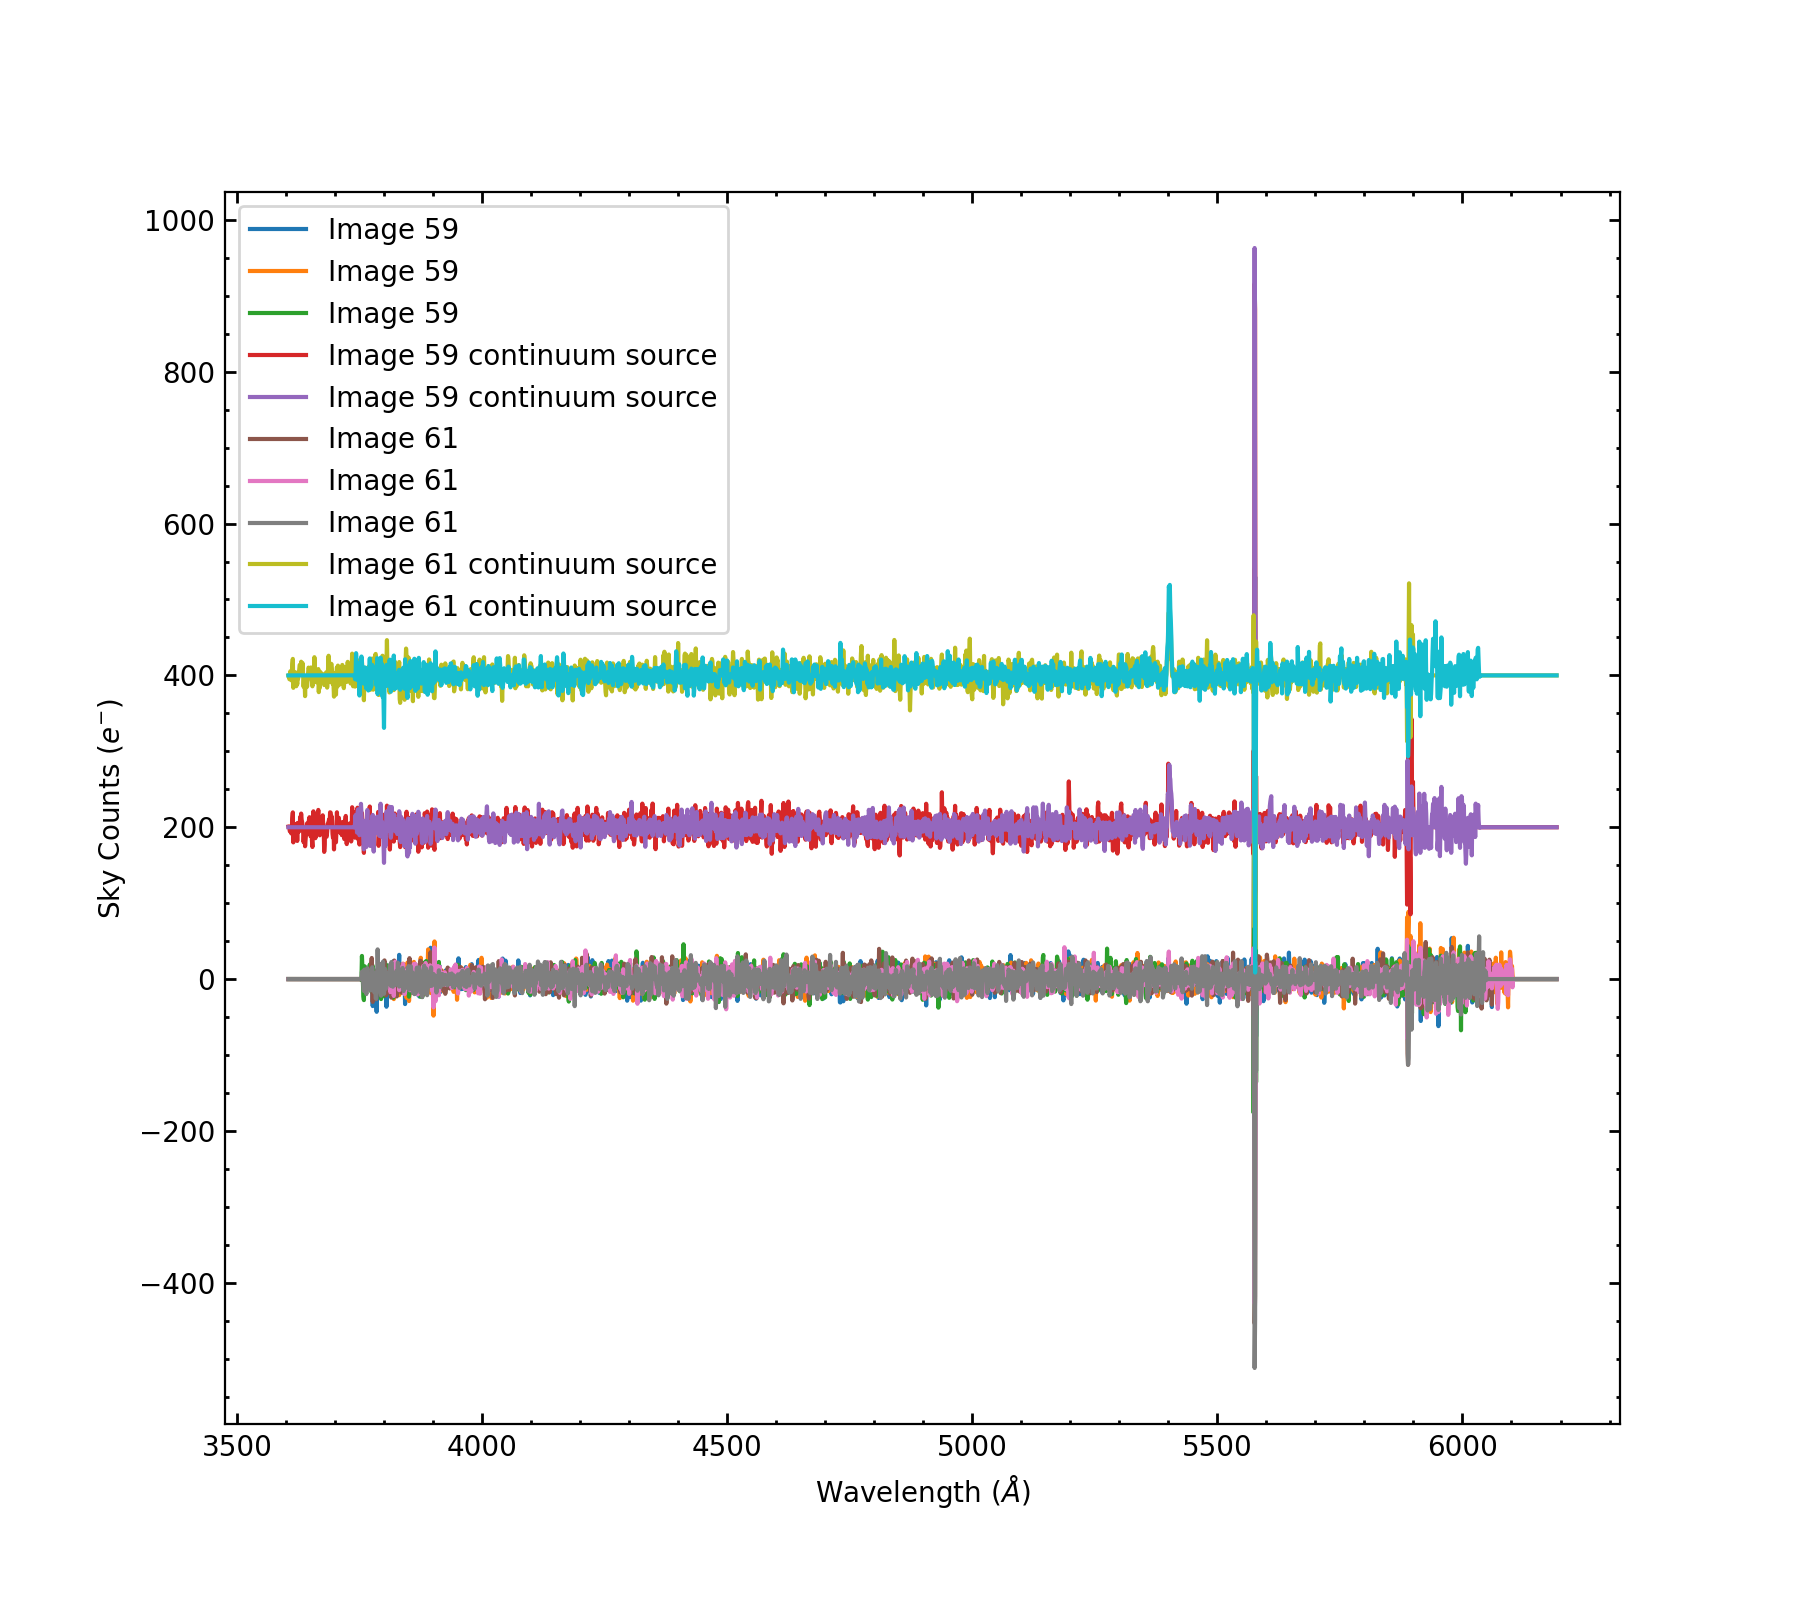

In [44]:
plt.figure(figsize=(9,8))

plt.plot(wl, c_sky_res[:, 22, 3], label = 'Image 59')
plt.plot(wl, c_sky_res[:, 25, 19], label = 'Image 59')
plt.plot(wl, c_sky_res[:, 56, 15], label = 'Image 59')
plt.plot(wl, c_sky_res[:, 32, 12] + 200, label = 'Image 59 continuum source')
plt.plot(wl, c_sky_res[:, 32, 11] + 200, label = 'Image 59 continuum source')
plt.plot(wl, c1_sky_res[:, 22, 3], label = 'Image 61')
plt.plot(wl, c1_sky_res[:, 25, 19], label = 'Image 61')
plt.plot(wl, c1_sky_res[:, 56, 15], label = 'Image 61')
plt.plot(wl, c1_sky_res[:, 32, 12] + 400, label = 'Image 61 continuum source')
plt.plot(wl, c1_sky_res[:, 32, 11] + 400, label = 'Image 61 continuum source')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
#plt.ylim([-100 * 10.0781, 180*10.0781*5])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.legend()

In [45]:
# d2 = np.sum(c_sky_res[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d2, origin='lower',  cmap='RdBu_r', aspect=0.5)

In [46]:
# d2 = np.sum(c1_sky_res[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d2, origin='lower',  cmap='RdBu_r', aspect=0.5)

# Step 5: project on the PCA basis

In [47]:
pca1 = PCA(n_components = 2)
seg1_projected = pca1.fit_transform(sky_res1_pca_pre)
print(seg1_projected.shape)
print(pca1.components_.shape)

pca2 = PCA(n_components = 2)
seg2_projected = pca2.fit_transform(sky_res2_pca_pre)
print(seg2_projected.shape)
print(pca2.components_.shape)

pca3 = PCA(n_components = 10)
seg3_projected = pca3.fit_transform(sky_res3_pca_pre)
print(seg3_projected.shape)
print(pca3.components_.shape)

# pca4 = PCA(n_components = 9)
# seg4_projected = pca4.fit_transform(sky_res4_pca_pre)
# print(seg4_projected.shape)
# print(pca4.components_.shape)

(1680, 2)
(2, 844)
(1680, 2)
(2, 650)
(1680, 10)
(10, 500)


In [48]:
c_sky_pca = c_sky_pol.copy()
c1_sky_pca = c1_sky_pol.copy()
c_sky_res[np.isnan(c_sky_res)] = 0
c1_sky_res[np.isnan(c1_sky_res)] = 0

for x_ in range(x):
    for y_ in range(y):
        #if x_ in range(x1, x2) and y_ in range(y1, y2):
        c_sky_pca[w1:w3, x_, y_] = c_sky_pca[w1:w3, x_, y_]  + np.matmul(pca1.transform(c_sky_res[w1:w3, x_, y_].reshape(1, sky_res1_pca.shape[1])), pca1.components_).reshape(sky_res1_pca.shape[1])
        c_sky_pca[w3:w4, x_, y_] = c_sky_pca[w3:w4, x_, y_]  + np.matmul(pca2.transform(c_sky_res[w3:w4, x_, y_].reshape(1, sky_res2_pca.shape[1])), pca2.components_).reshape(sky_res2_pca.shape[1])
        c_sky_pca[w4:w2, x_, y_] = c_sky_pca[w4:w2, x_, y_]  + np.matmul(pca3.transform(c_sky_res[w4:w2, x_, y_].reshape(1, sky_res3_pca.shape[1])), pca3.components_).reshape(sky_res3_pca.shape[1])
#         c_sky_pca[w1:w2, x_, y_] = c_sky_pca[w1:w2, x_, y_]  + np.matmul(pca4.transform(c_sky_res[w1:w2, x_, y_].reshape(1, sky_res4_pca.shape[1])), pca4.components_).reshape(sky_res4_pca.shape[1])


        c1_sky_pca[w1:w3, x_, y_] = c1_sky_pca[w1:w3, x_, y_] + np.matmul(pca1.transform(c1_sky_res[w1:w3, x_, y_].reshape(1, sky_res1_pca.shape[1])), pca1.components_).reshape(sky_res1_pca.shape[1])
        c1_sky_pca[w3:w4, x_, y_] = c1_sky_pca[w3:w4, x_, y_] + np.matmul(pca2.transform(c1_sky_res[w3:w4, x_, y_].reshape(1, sky_res2_pca.shape[1])), pca2.components_).reshape(sky_res2_pca.shape[1])
        c1_sky_pca[w4:w2, x_, y_] = c1_sky_pca[w4:w2, x_, y_] + np.matmul(pca3.transform(c1_sky_res[w4:w2, x_, y_].reshape(1, sky_res3_pca.shape[1])), pca3.components_).reshape(sky_res3_pca.shape[1])
#         c1_sky_pca[w1:w2, x_, y_] = c1_sky_pca[w1:w2, x_, y_] + np.matmul(pca4.transform(c1_sky_res[w1:w2, x_, y_].reshape(1, sky_res4_pca.shape[1])), pca4.components_).reshape(sky_res4_pca.shape[1])



In [49]:
c_sky_sub_pca = c - c_sky_pca
c1_sky_sub_pca = c1 - c1_sky_pca

In [50]:
path = r'/Users/caridlin/Documents/KCWI20201120/redux_obsolete/kb201120_00059_icube.fits'


image = fits.open(path)
h3 = image[0].header
c3 = image[0].data
w, x, y = c.shape
print(w, x, y)

path = r'/Users/caridlin/Documents/KCWI20201120/redux_obsolete/kb201120_00061_icube.fits'


image = fits.open(path)
h4 = image[0].header
c4 = image[0].data
w, x, y = c.shape
print(w, x, y)

path = r'/Users/caridlin/Documents/KCWI20201120/redux_obsolete/kb201120_00059_mcube.fits'


image = fits.open(path)
h5 = image[0].header
c5 = image[0].data
w, x, y = c.shape
print(w, x, y)

path = r'/Users/caridlin/Documents/KCWI20201120/redux_obsolete/kb201120_00061_mcube.fits'


image = fits.open(path)
h6 = image[0].header
c6 = image[0].data
w, x, y = c.shape
print(w, x, y)

2588 70 24
2588 70 24
2588 70 24
2588 70 24


<IPython.core.display.Javascript object>


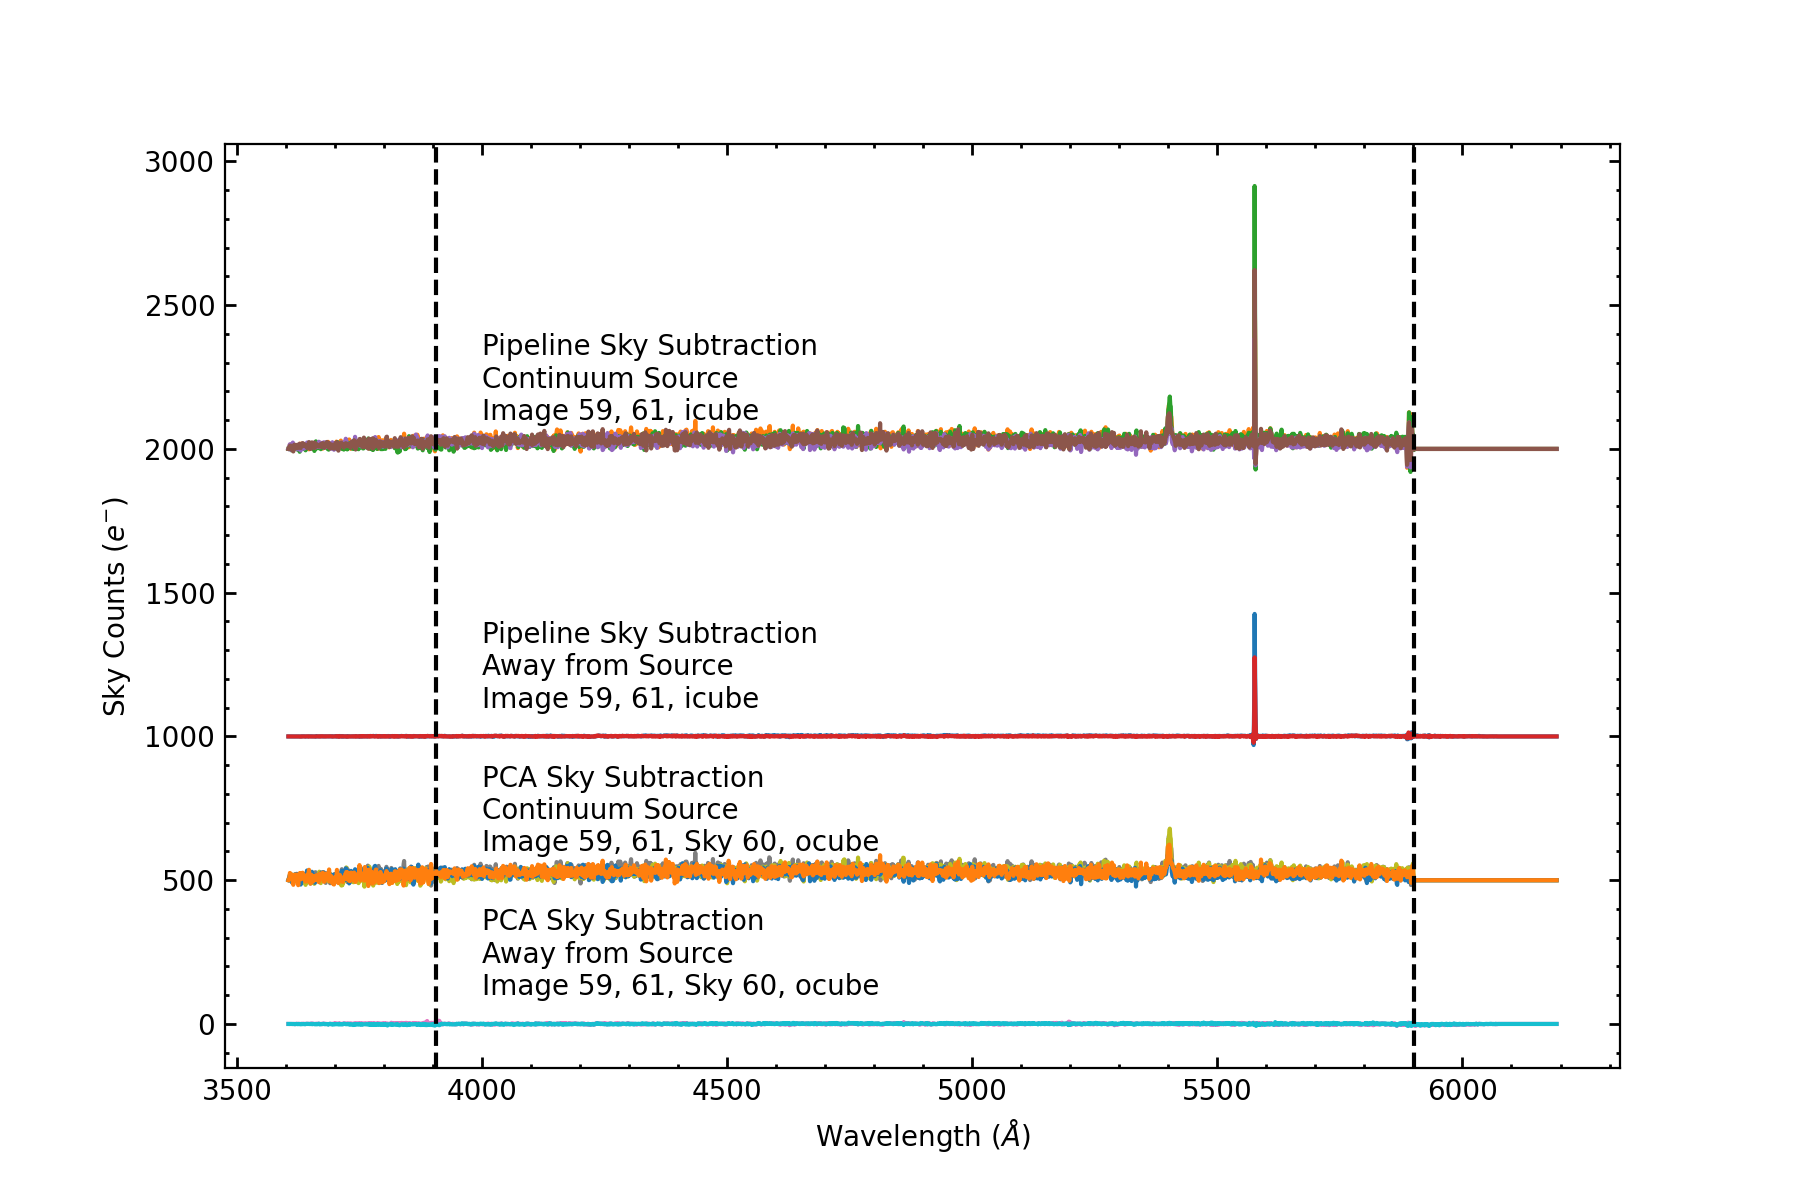

Text(4000, 100, 'PCA Sky Subtraction \nAway from Source \nImage 59, 61, Sky 60, ocube')

In [51]:
# The main difference compared with last time is that i use 9 eigenspectra this time.

plt.figure(figsize=(9,6))

plt.plot(wl, np.mean(c3[:, 16:29, 4:19], axis = (1, 2)) + 1000, label = 'Image 59 pipeline')
# plt.plot(wl, c3[:, 25, 19]+ 1000, label = 'Image 59 pipeline')
# plt.plot(wl, c3[:, 56, 19]+ 1000, label = 'Image 59 pipeline')
plt.plot(wl, c3[:, 34, 12]+ 2000, label = 'Image 59 pipeline continuum')
plt.plot(wl, c3[:, 33, 12]+ 2000, label = 'Image 59 pipeline continuum')
plt.plot(wl, np.mean(c4[:, 16:29, 4:19], axis = (1, 2)) + 1000, label = 'Image 61 pipeline')
plt.plot(wl, c4[:, 34, 12]+ 2000, label = 'Image 61 pipeline continuum')
plt.plot(wl, c4[:, 33, 12]+ 2000, label = 'Image 61 pipeline continuum')

# plt.plot(wl, c_sky_sub_pca[:, 22, 3], label = 'Image 59 PCA')
# plt.plot(wl, c_sky_sub_pca[:, 25, 19], label = 'Image 59 PCA')
# plt.plot(wl, c_sky_sub_pca[:, 56, 19], label = 'Image 59 PCA')
plt.plot(wl, np.mean(c_sky_sub_pca[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 59 PCA')
#plt.plot(wl, np.mean(c_sky_sub[:, 16:29, 4:19], axis = (1, 2)), color = 'black', label = 'Image 59 PCA')
#plt.plot(wl, np.mean(c1_sky_res[:, 16:29, 4:19], axis = (1, 2)), color = 'black', label = 'Image 61 PCA')
#plt.plot(wl, c_sky_sub_pca[:, 5, 8], label = 'Image 59 PCA')
plt.plot(wl, c_sky_sub_pca[:, 34, 12] + 500, label = 'Image 59 PCA continuum')
plt.plot(wl, c_sky_sub_pca[:, 33, 12] + 500, label = 'Image 59 PCA continuum')
plt.plot(wl, np.mean(c1_sky_sub_pca[:, 16:29, 4:19], axis = (1, 2)), label = 'Image 61 PCA')
plt.plot(wl, c1_sky_sub_pca[:, 34, 12] + 500, label = 'Image 61 PCA continuum')
plt.plot(wl, c1_sky_sub_pca[:, 33, 12] + 500, label = 'Image 61 PCA continuum')
plt.axvline(h2['WAVGOOD0'], color = 'black', linestyle = '--')
plt.axvline(h2['WAVGOOD1'], color = 'black', linestyle = '--')
plt.tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
           grid_color='black', grid_alpha=0.5)
# plt.ylim([-500, 3000])
# plt.xlim([2000,6200])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Sky Counts ($e^{-}$)')
plt.annotate('Pipeline Sky Subtraction \nContinuum Source \nImage 59, 61, icube', xy = (4000, 2100))
plt.annotate('Pipeline Sky Subtraction \nAway from Source \nImage 59, 61, icube', xy = (4000, 1100))
plt.annotate('PCA Sky Subtraction \nContinuum Source \nImage 59, 61, Sky 60, ocube', xy = (4000, 600))
plt.annotate('PCA Sky Subtraction \nAway from Source \nImage 59, 61, Sky 60, ocube', xy = (4000, 100))
#plt.legend(loc = 2)

In [52]:
hdu = fits.PrimaryHDU(c_sky_sub_pca)
#hdu = fits.PrimaryHDU(c_sky_sub)
hdulist = fits.HDUList([hdu])
hdulist[0].header = h
hdulist.writeto(r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00059_icube_pca.fits', overwrite=True)

hdu = fits.PrimaryHDU(c1_sky_sub_pca)
#hdu = fits.PrimaryHDU(c1_sky_sub)
hdulist = fits.HDUList([hdu])
hdulist[0].header = h
hdulist.writeto(r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00061_icube_pca.fits', overwrite=True)

hdu = fits.PrimaryHDU(c_sky_pca)
hdulist = fits.HDUList([hdu])
hdulist[0].header = h
hdulist.writeto(r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00059_scube_pca.fits', overwrite=True)

hdu = fits.PrimaryHDU(c1_sky_pca)
hdulist = fits.HDUList([hdu])
hdulist[0].header = h
hdulist.writeto(r'/Users/caridlin/Documents/KCWI20201120/redux/kb201120_00061_scube_pca.fits', overwrite=True)

In [53]:
# d = np.sum(c_sky_sub_pca[w1:w2], axis = 0)


# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = -2e3, vmax = 6e4)

In [54]:
# d = np.sum(c3[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 2e3, vmax = 7e4)

In [55]:
# d = np.sum(c1_sky_sub_pca[w1:w2], axis = 0)


# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = -6e3, vmax = 6e4)

In [56]:
# d = np.sum(c4[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 1e3, vmax = 5e4)

In [57]:
# d = np.sum(c_sky_sub_pca[w1:w2], axis = 0)-np.sum(c3[w1:w2], axis = 0)
# #d = np.sum(c, axis = 0)
# plt.figure()
# plt.imshow(d, origin='lower',  cmap='RdBu_r', aspect=0.5, vmin = 1e3, vmax = 5e4)